# Eksploracyjna analiza danych
  *autor: Piotr Dłubak*
- Poznań, lipiec 2023  -
  ver: 0.6 - wersja developerska

#### Cel analizy


1. Badana populacja: klienci sklepów spożywczych
2. Rodzaj badania: ankieta on-line dostępna dla wszystkich użytkowników na terenie Polski
3. Metoda analizy: EDA ("Exploratory Data Analysis") - analiza deskrypcyjna

Analiza deskrypcyjna to proces badania, opisywania i interpretacji danych w celu uzyskania wglądu i zrozumienia ich cech, wzorców i związków. Jest to technika często stosowana w dziedzinach naukowych, badań społecznych, statystyce, lingwistyce i wielu innych dziedzinach.

Głównym celem analizy deskrypcyjnej jest opisanie i podsumowanie danych w sposób, który ujawnia istotne informacje. Może obejmować takie elementy jak obliczanie średnich, median, odchyleń standardowych, minimalnych i maksymalnych wartości, oraz prezentowanie danych w postaci tabel, wykresów lub grafów.

Analiza deskrypcyjna umożliwia identyfikację kluczowych cech, trendów, anomalii i relacji w danych. Może również pomóc w odkrywaniu wzorców, porównywaniu grup lub kategorii danych oraz wyprowadzaniu wniosków na podstawie zebranych informacji.

Głównym celem EDA jest zapewnienie wglądu w dane jeszcze przed sformułowaniem jakichkolwiek założeń. Pomaga identyfikować oczywiste błędy, lepiej pojmować wzorce występujące w obrębie danych, wykrywać wartości odstające i anomalie, a także odnajdywać interesujące relacje między zmiennymi.

Po przeprowadzeniu analizy EDA i uzyskaniu istotnych spostrzeżeń wciąż można wykorzystać tę metodę do bardziej zaawansowanej analizy danych lub modelowania, w tym na potrzeby uczenia maszynowego.

Wyniki przeprowadzonej analizy pokazały, że dla współczesnego
konsumenta decyzja o zakupie produktu nie jest motywowana wyłącznie
chęcią zaspokojenia określonych potrzeb, ale w znacznym stopniu determinuje ją
potrzeba demonstracji przekonań, statusu społeczno-ekonomicznego i stylu życia.
Nowoczesny model konsumpcji niesie określone konsekwencje dla praktyki działań
marketingowych.


Badanie ankietowe dotyczyło postaw i zachowań respondentów w tracie dokonywania
zakupów produktów żywnościowych. W tym celu został skonstruowany kwestionariusz ankiety


**Cechy, takie jak wiek, płeć, wykształcenie, preferowany typ sklepu, dochody netto, preferowana marka sklepu, preferowany towar, preferowany rodzaj promocji oraz czynnik zakupowy, mogą wpływać na wysokość zakupów żywnościowych. **

### Wymagania dotyczące danych: Zdefiniowenie zakresu analizy (zmienne, obserwacje, zakresy dziedzinowe)
   

#### Załadowanie bibliotek

In [113]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
import itertools
import random
from scipy.stats import shapiro, normaltest, skew, kurtosis, iqr
from scipy.stats import jarque_bera
import re
import math

warnings.filterwarnings("ignore")

### 1.1. Pozyskanie danych

* Dane ankietowe do analizy pozyskano od klientow sklepów spożywczych w formie ankiety on-line udostępnionej dla wszystkich użytkowników na terenie
* Po wstępnym przygotowaniu i oczyszczeniu danych ankietowych aładowano do pliku baza.xlsx

### 1.2. Pobranie i załadowanie danych

In [114]:

dane = pd.read_excel('baza.xlsx')


### 1.3. Wyświetlenie pierwszych wierszy tabel

In [115]:
dane.head()

,nr respondenta,płeć,wykształcenie,wiek,liczba osób w rodzinie,preferowany typ sklepu,preferowana marka sklepu,preferowanay towar,czynnik zakupowy,rodzaj promocji,miasto,liczba ludności,dochody,wydatki,średnia częstość zakupów w tyg,wiek_kat,dochody_kat,wydatki_kat,wielkość miasta
0,R_005,m,zawodowe,38,5,osiedlowy,Lidl,mięso i wędliny,jakość,gazetka,Ostrowiec Świętokrzyski,69715,28000.0,9000.0,3,23-39,niski,niski,51 tys.-200 tys.
1,R_010,m,zawodowe,59,1,osiedlowy,Netto,mięso i wędliny,marka,inne,Lubin,78937,30000.0,7080.0,3,40-65,niski,niski,51 tys.-200 tys.
2,R_036,m,wyższe,35,1,galeria,Żabka,mięso i wędliny,jakość,gazetka,Biała Podlaska,57957,35000.0,9036.0,19,23-39,niski,niski,51 tys.-200 tys.
3,R_044,k,podstawowe,58,5,osiedlowy,Biedronka,mięso i wędliny,marka,gazetka,Lubin,78937,39000.0,9396.0,3,40-65,średni,średni,51 tys.-200 tys.
4,R_047,k,zawodowe,26,3,bazarek,Inna_lokalna,mięso i wędliny,cena,gazetka,Zduńska Wola,43719,39000.0,9432.0,8,23-39,średni,średni,<50 tys.


### 1.4. Wyświetlenie informacji o tabelach

In [116]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   nr respondenta                  125 non-null    object 
 1   płeć                            125 non-null    object 
 2   wykształcenie                   125 non-null    object 
 3   wiek                            125 non-null    int64  
 4   liczba osób w rodzinie          125 non-null    int64  
 5   preferowany typ sklepu          125 non-null    object 
 6   preferowana marka sklepu        125 non-null    object 
 7   preferowanay towar              125 non-null    object 
 8   czynnik zakupowy                125 non-null    object 
 9   rodzaj promocji                 125 non-null    object 
 10  miasto                          125 non-null    object 
 11  liczba ludności                 125 non-null    int64  
 12  dochody                         125 

#  E.D.A.

## 2. Analiza danych

### **2.1. Analiza danych numerycznych - jednowymiarowa**

#### 2.1.1 Tabele liczebności i częstości

In [117]:
dane.select_dtypes(include=[np.number]).columns.to_list()


['wiek',
 'liczba osób w rodzinie',
 'liczba ludności',
 'dochody',
 'wydatki',
 'średnia częstość zakupów w tyg']

In [118]:
num = ['wiek','liczba osób w rodzinie','dochody','wydatki','średnia częstość zakupów w tyg']

for column in num:
    print('=' * 75)
    tab = pd.DataFrame(dane[column].value_counts(bins=5).sort_index().round(2))
    tab['licz skum'] = tab['count'].cumsum()
    tab['częstość'] = tab['count'] / (tab['count'].sum()) * 100
    tab['częstość skum'] = tab['częstość'].cumsum()
    print(tab)
    print('=' * 75)

                            count  licz skum  częstość  częstość skum
wiek                                                                 
(15.937000000000001, 28.4]     30         30      24.0           24.0
(28.4, 40.8]                   17         47      13.6           37.6
(40.8, 53.2]                   29         76      23.2           60.8
(53.2, 65.6]                   23         99      18.4           79.2
(65.6, 78.0]                   26        125      20.8          100.0
                        count  licz skum  częstość  częstość skum
liczba osób w rodzinie                                           
(0.995, 1.8]               24         24      19.2           19.2
(1.8, 2.6]                 26         50      20.8           40.0
(2.6, 3.4]                 19         69      15.2           55.2
(3.4, 4.2]                 23         92      18.4           73.6
(4.2, 5.0]                 33        125      26.4          100.0
                      count  licz skum  częstość

#### 2.1.2 Podstawowe parametry statystyczne

In [119]:
def stat(df):
    suma = df.sum()
    liczba = df.count()
    braki = df.isna().sum()
    min = df.min()
    max  = df.max()
    średnia = df.mean().round(2)
    rozstęp = (df.max()-df.min()).round(2)
    Q_10 = df.quantile(.1).round(2)
    Q1_25 = df.quantile(.25).round(2)
    Q2_50 =  df.quantile(.5).round(2)
    Q3_75 = df.quantile(.75).round(2)
    Q_90 = df.quantile(.9).round(2)
    IQR = df.quantile(.75) - df.quantile(.25).round(2)
    odch_cwiar =  ((Q3_75  - Q1_25)/2).round(2)
    odchylenie_przeciętne = (np.mean(np.abs(df - df.mean()))/df.mean()*100).round(2)
    wariancja =  df.var(ddof=1).round(3)
    odch_std = df.std(ddof=1).round(3)
    błąd_odch_std =  df.std(ddof=1)/np.sqrt(df.count()).round(3)
    kl_wsp_zmien = df.std(ddof=1)/df.mean().round(2)
    poz_wsp_zmien =  ((df.quantile(.75) - df.quantile(.25))/df.quantile(.5)).round(2)
    skośność = df.skew().round(2)
    kurtoza =  df.kurtosis().round(2)

    wyniki = pd.DataFrame({'liczba':liczba,'liczba brakujących':braki,'suma': suma,'min':min, 'max':max,
                            'średnia': średnia,'rozstęp':  rozstęp,'Q_10%': Q_10 ,'Q1_25%': Q1_25 ,'Q2_50%':   Q2_50 ,'Q3_75%':  Q3_75 ,'Q_90%':   Q_90,'IQR': IQR ,
                            'odch_cwiar': odch_cwiar,'odchylenie przeciętne': odchylenie_przeciętne, 'wariancja':  wariancja,'odch_std': odch_std, 'błąd_odch_std':  błąd_odch_std,
                            'kl_wsp_zmien':  kl_wsp_zmien, 'poz_wsp_zmien':  poz_wsp_zmien, 'skośność':  skośność, 'kurtoza': kurtoza
                           })

   
    return wyniki.T.round(2)

In [120]:
stat(dane[num])

,wiek,liczba osób w rodzinie,dochody,wydatki,średnia częstość zakupów w tyg
liczba,125.00,125.00,125.00,125.00,125.00
liczba brakujących,0.00,0.00,0.00,0.00,0.00
suma,5849.00,390.00,5400826.40,1294229.88,1219.00
min,16.00,1.00,26000.00,5160.00,3.00
max,78.00,5.00,61000.00,14964.00,19.00
średnia,46.79,3.12,43206.61,10353.84,9.75
rozstęp,62.00,4.00,35000.00,9804.00,16.00
Q_10%,24.00,1.00,33400.00,8090.40,3.00
Q1_25%,29.00,2.00,38000.00,9060.00,3.00
Q2_50%,46.00,3.00,43000.00,10255.40,8.00


#### 2.1.3 Ocena zgodnosci z rozkladem normalnym

In [121]:
from scipy.stats import shapiro, normaltest, skewtest, kurtosistest, jarque_bera
import statsmodels.api as sm

def testy_normalnosci(x):
    alpha = 0.05

    stat, p = shapiro(x)
    if p > alpha:
        print(f'Shapiro-Wilk Test: statystyka-t: {stat:.4f}, p-value {p:.4f}  próbka ma rozkład normalny')
    else:
        print(f'Shapiro-Wilk Test: statystyka-t: {stat:.4f}, p-value {p:.4f}   próbka nie ma rozkładu normalnego')

    stat, p = sm.stats.diagnostic.lilliefors(x, 'norm')
    if p > alpha:
        print(f'Lilliefors Test:   statystyka-t: {stat:.4f}, p-value {p:.4f}  próbka ma rozkład normalny')
    else:
        print(f'Lilliefors Test:   statystyka-t: {stat:.4f}, p-value {p:.4f}  próbka nie ma rozkładu normalnego')

    stat, p = normaltest(x)
    if p > alpha:
        print(f'D.Agostino Test:   statystyka-t: {stat:.4f}, p-value {p:.4f}  próbka ma rozkład normalny')
    else:
        print(f'D.Agostino Test:   statystyka-t: {stat:.4f}, p-value {p:.4f}  próbka nie ma rozkładu normalnego')

    stat, p = skewtest(x)
    if p > alpha:
        print(f'Test skośnosci:    statystyka-t: {stat:.4f}, p-value {p:.4f}  próbka ma rozkład normalny')
    else:
        print(f'Test skośnosci:    statystyka-t: {stat:.4f}, p-value {p:.4f}  próbka nie ma rozkładu normalnego')

    stat, p = kurtosistest(x)
    if p > alpha:
        print(f'Test kurtozy:      statystyka-t: {stat:.4f}, p-value {p:.4f}  próbka ma rozkład normalny')
    else:
        print(f'Test kurtozy:      statystyka-t: {stat:.4f}, p-value {p:.4f}  próbka nie ma rozkładu normalnego')

    stat, p = jarque_bera(x)
    if p > alpha:
        print(f'Test Jarque_Bera:  statystyka-t: {stat:.4f}, p-value {p:.4f}  próbka ma rozkład normalny')
    else:
        print(f'Test Jarque_Bera:  statystyka-t: {stat:.4f}, p-value {p:.4f}  próbka nie ma rozkładu normalnego')




In [122]:

for column in num:
    print(f'{column.upper()}:')
    print()
    testy_normalnosci(dane[column])
    print()

WIEK:

Shapiro-Wilk Test: statystyka-t: 0.9490, p-value 0.0001   próbka nie ma rozkładu normalnego
Lilliefors Test:   statystyka-t: 0.1055, p-value 0.0029  próbka nie ma rozkładu normalnego
D.Agostino Test:   statystyka-t: 57.5772, p-value 0.0000  próbka nie ma rozkładu normalnego
Test skośnosci:    statystyka-t: -0.0005, p-value 0.9996  próbka ma rozkład normalny
Test kurtozy:      statystyka-t: -7.5880, p-value 0.0000  próbka nie ma rozkładu normalnego
Test Jarque_Bera:  statystyka-t: 8.0204, p-value 0.0181  próbka nie ma rozkładu normalnego

LICZBA OSÓB W RODZINIE:

Shapiro-Wilk Test: statystyka-t: 0.8670, p-value 0.0000   próbka nie ma rozkładu normalnego
Lilliefors Test:   statystyka-t: 0.1739, p-value 0.0010  próbka nie ma rozkładu normalnego
D.Agostino Test:   statystyka-t: 197.2516, p-value 0.0000  próbka nie ma rozkładu normalnego
Test skośnosci:    statystyka-t: -0.3561, p-value 0.7218  próbka ma rozkład normalny
Test kurtozy:      statystyka-t: -14.0401, p-value 0.0000  prób

#### 2.1.4 Wykresy

In [123]:
def plot_num(dane):
    plt.figure(figsize=(12, 3))
    plt.rcParams['axes.facecolor'] = 'white'
    plt.suptitle(f'Rozkład zmiennej ilościowej:  {dane.name}', fontsize=11, color='black')
    plt.subplot(1, 3, 1)
    ax1 = dane.plot(kind='hist', bins=4,edgecolor='blue', linewidth=0.8, color='white')
    counts, bins, patches = plt.hist(dane, bins=4,edgecolor='blue', linewidth=0.8, color='white')
    ax1.tick_params(axis='both', which='both', labelsize=8)
    ax1.set_title('Histogram', color='blue', size=10)
    ax1.set_xlabel(dane.name, fontsize=8)
    ax1.set_ylabel('Liczebność', fontsize=8)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    for count, bin_value, patch in zip(counts, bins, patches):
        plt.annotate(str(int(count)), xy=(bin_value, count), xytext=(10, 1),textcoords='offset points', ha='center', va='bottom',fontsize=8, color='black')

    plt.subplot(1, 3, 2)
    ax2 = dane.plot(kind='box')
    ax2.tick_params(axis='both', which='both', labelsize=8)
    ax2.set_title('Boxplot', color='blue', size=10)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
        # Dodanie adnotacji z oznaczeniem średniej
    mean_value = dane.mean()

    plt.axhline(mean_value, color='blue', linestyle='--', linewidth=0.5)
    plt.annotate(f'Mean: {mean_value:.2f}', xy=(1.2, mean_value), xytext=(20, -5), textcoords='offset points', ha='center', va='center', fontsize=6, color='black')

    plt.subplot(1, 3, 3)
    ax3 = dane.plot(kind='kde')
    ax3.tick_params(axis='both', which='both', labelsize=8)
    ax3.set_title('KDE', color='blue', size=10)
    ax3.set_xlabel(dane.name, fontsize=8)
    ax3.set_ylabel('Gęstość', fontsize=8)
    ax3.spines['right'].set_visible(False)
    ax3.spines['top'].set_visible(False)

    ax2.grid(axis='y', linestyle='--', color='lightgray')

    plt.tight_layout()
    plt.show()


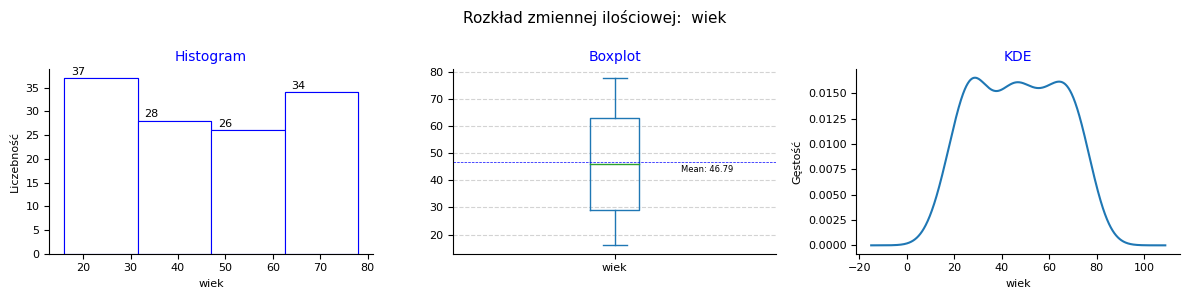

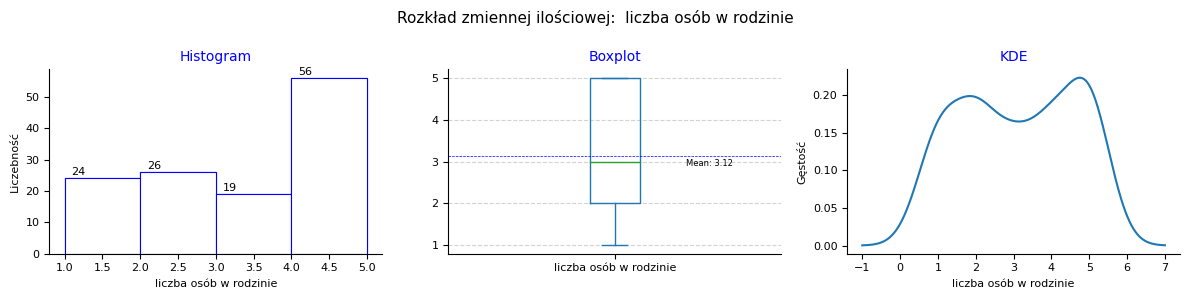

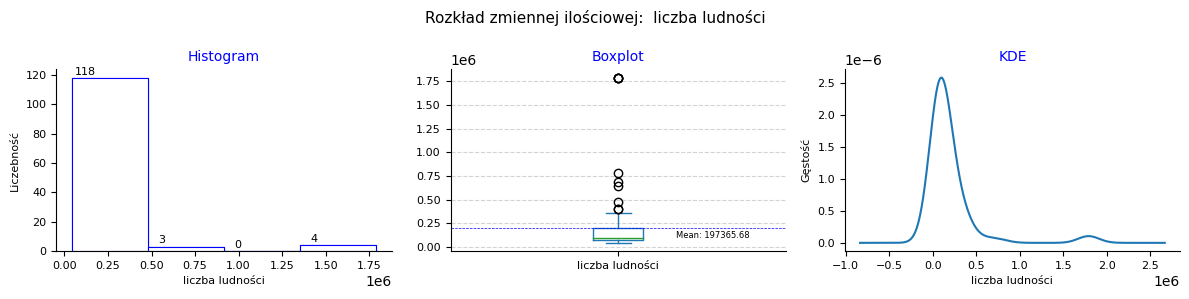

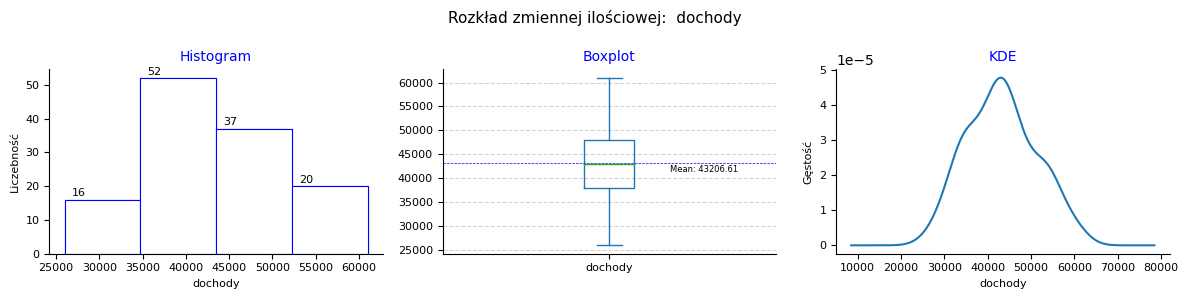

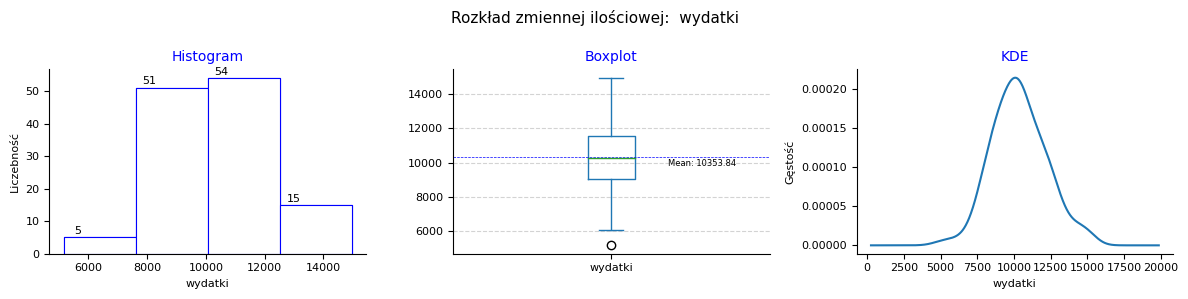

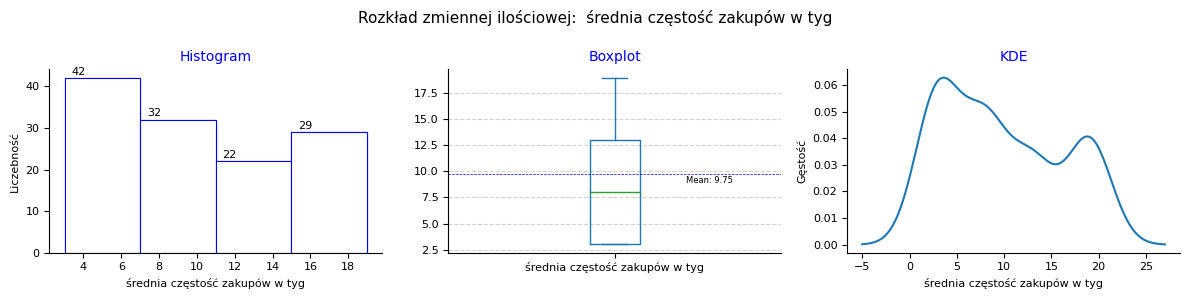

In [124]:

num = dane.select_dtypes(include=[np.number]).columns.to_list()

for column in num:
    plot_num(dane[column])

### **2.2. Analiza danych kategorialnych - jednowymiarowa**

#### 2.2.1 Tabele liczebności i częstości

In [125]:
zmienna_tekstowa= ['płeć', 'wykształcenie',
 'preferowany typ sklepu','preferowana marka sklepu', 'preferowanay towar', 'czynnik zakupowy',
 'rodzaj promocji', 'wiek_kat',	'dochody_kat'	,'wydatki_kat',	'wielkość miasta']

for element in zmienna_tekstowa:
    print('='*50)
    tabela = pd.DataFrame(dane[element].value_counts())
    tabela['f %']=(tabela['count']/(tabela['count'].sum())*100)
    print(tabela)
    print()

      count   f %
płeć             
k        85  68.0
m        40  32.0

               count   f %
wykształcenie             
wyższe            75  60.0
średnie           25  20.0
zawodowe          16  12.8
podstawowe         9   7.2

                        count   f %
preferowany typ sklepu             
supermarket                38  30.4
osiedlowy                  30  24.0
bazarek                    29  23.2
galeria                    28  22.4

                          count   f %
preferowana marka sklepu             
Biedronka                    33  26.4
Inna_lokalna                 31  24.8
Lidl                         21  16.8
Netto                        14  11.2
Kaufland                     14  11.2
Żabka                        12   9.6

                      count   f %
preferowanay towar               
produkty piekarnicze     23  18.4
owoce i warzywa          22  17.6
mięso i wędliny          20  16.0
produkty mleczne         19  15.2
napoje                   18  14.4
słod

#### 2.2.2 Wykresy

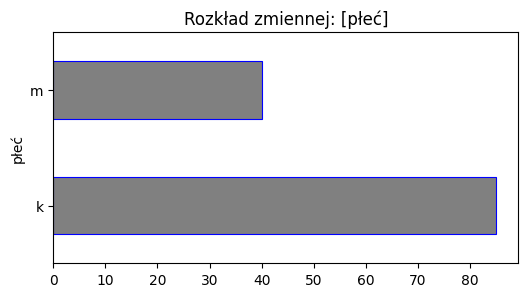

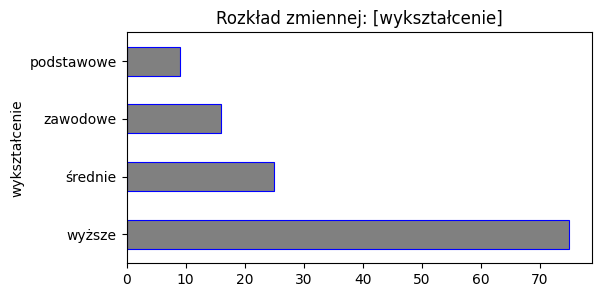

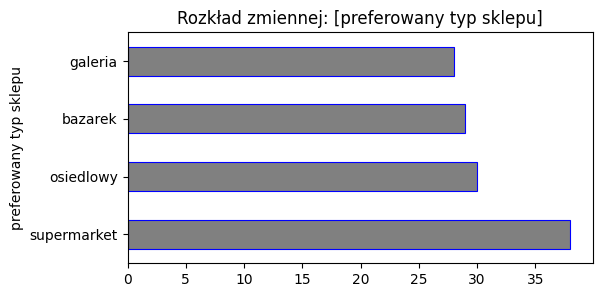

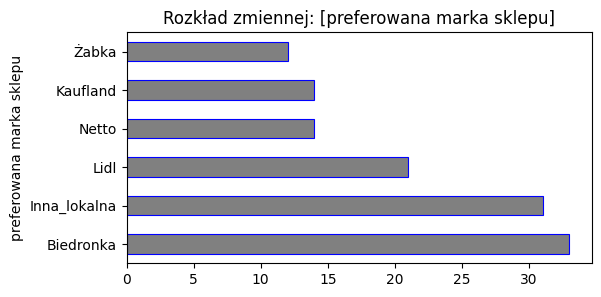

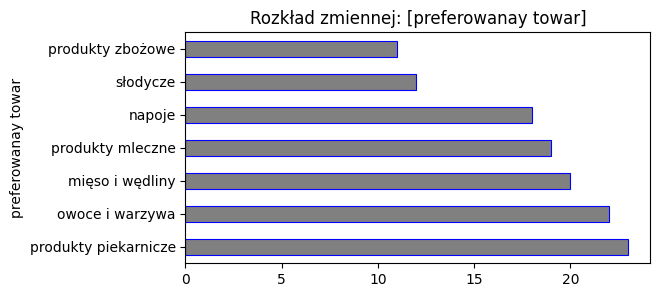

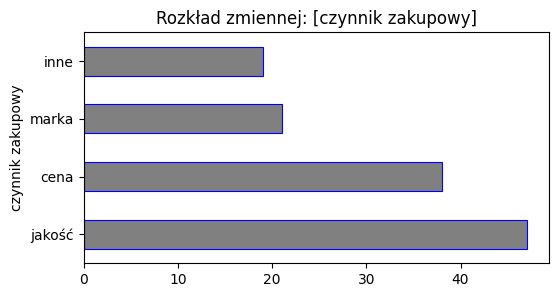

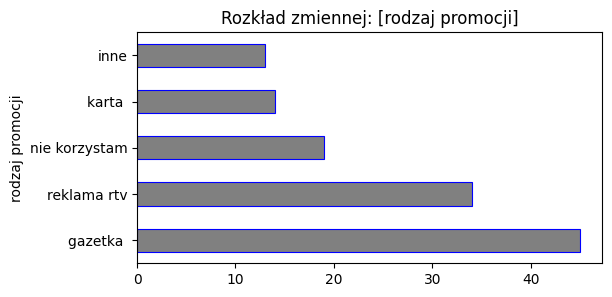

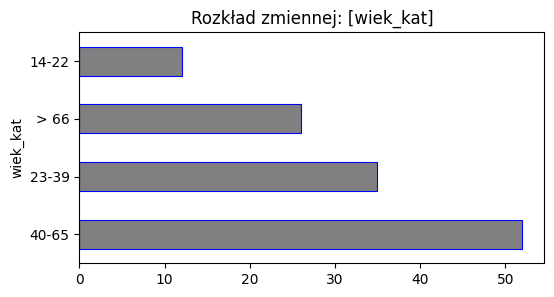

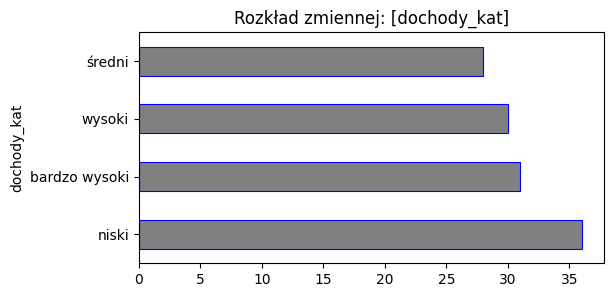

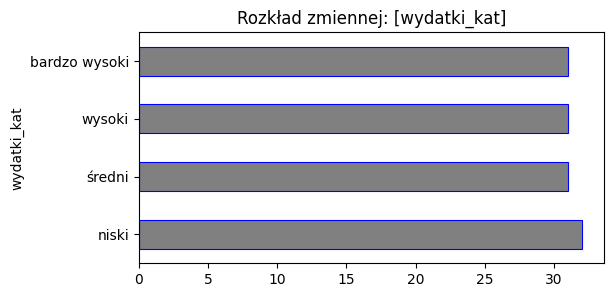

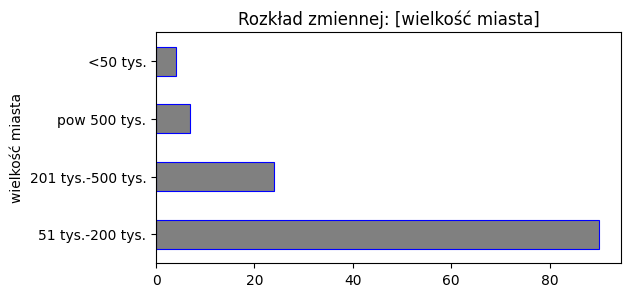

In [126]:

    
for element in zmienna_tekstowa:
    plt.figure(figsize=(6, 3))
    dane[element].value_counts().plot(kind = 'barh',edgecolor='blue', linewidth=0.8, color='grey', title=f'Rozkład zmiennej: [{element}]')

### **2.3. Analiza danych numerycznych - analiza porównawcza wg poziomów zmiennej kategorialnej**

#### 2.3.1. Podstawowe statystyki

In [127]:
zmienna_tekstowa= ['płeć', 'wykształcenie',
 'preferowany typ sklepu','preferowana marka sklepu', 'preferowanay towar', 'czynnik zakupowy',
 'rodzaj promocji', 'wiek_kat','wielkość miasta']

print('DOCHODY')

for element in zmienna_tekstowa:
    grup = pd.DataFrame(dane.groupby([element])['dochody'].describe()).round(2)
    display(grup)

print('WYDATKI:')

for element in zmienna_tekstowa:
    grup = pd.DataFrame(dane.groupby([element])['wydatki'].describe()).round(2)
    display(grup)



DOCHODY


,count,mean,std,min,25%,50%,75%,max
płeć,,,,,,,,
k,85.0,46263.68,6271.34,33000.0,42000.0,45000.0,50000.0,61000.0
m,40.0,36710.33,7192.74,26000.0,32000.0,35000.0,38000.0,54000.0


,count,mean,std,min,25%,50%,75%,max
wykształcenie,,,,,,,,
podstawowe,9.0,39555.56,7333.33,26000.0,38000.0,39000.0,39000.0,54000.0
wyższe,75.0,46112.18,7607.48,34000.0,41500.0,46000.0,52000.0,61000.0
zawodowe,16.0,35963.32,5638.25,28000.0,30000.0,39000.0,40000.0,43206.6
średnie,25.0,40440.00,5881.33,32000.0,34000.0,41000.0,43000.0,54000.0


,count,mean,std,min,25%,50%,75%,max
preferowany typ sklepu,,,,,,,,
bazarek,29.0,39317.47,8280.30,26000.0,32000.0,39000.0,44000.0,54000.0
galeria,28.0,49328.81,7778.26,35000.0,47000.0,51500.0,54000.0,61000.0
osiedlowy,30.0,39440.22,5027.10,28000.0,38000.0,40000.0,42500.0,49000.0
supermarket,38.0,44637.02,6422.53,33000.0,42000.0,44000.0,46000.0,60000.0


,count,mean,std,min,25%,50%,75%,max
preferowana marka sklepu,,,,,,,,
Biedronka,33.0,45121.21,8929.44,30000.0,39000.00,43000.0,54000.00,61000.0
Inna_lokalna,31.0,42239.14,6772.84,30000.0,36500.00,43000.0,45500.00,60000.0
Kaufland,14.0,46443.33,7211.38,32000.0,42301.65,47000.0,53500.00,54000.0
Lidl,21.0,40666.67,7330.30,28000.0,35000.00,43000.0,45000.00,54000.0
Netto,14.0,40800.47,10352.67,26000.0,32500.00,39000.0,48301.65,59000.0
Żabka,12.0,43916.67,4399.55,35000.0,41000.00,43500.0,47000.00,51000.0


,count,mean,std,min,25%,50%,75%,max
preferowanay towar,,,,,,,,
mięso i wędliny,20.0,43650.00,8640.63,28000.0,39000.0,45500.0,48000.0,61000.0
napoje,18.0,41944.44,8341.76,30000.0,35000.0,38000.0,47250.0,57000.0
owoce i warzywa,22.0,42800.90,9098.03,26000.0,34250.0,43206.6,47750.0,61000.0
produkty mleczne,19.0,42947.37,6450.44,32000.0,41000.0,43000.0,44000.0,59000.0
produkty piekarnicze,23.0,43043.48,6033.83,30000.0,38500.0,44000.0,47500.0,54000.0
produkty zbożowe,11.0,46727.27,9634.22,29000.0,42000.0,52000.0,54000.0,57000.0
słodycze,12.0,42600.55,8565.94,31000.0,35000.0,40500.0,51750.0,54000.0


,count,mean,std,min,25%,50%,75%,max
czynnik zakupowy,,,,,,,,
cena,38.0,42973.68,7903.08,32000.0,35750.0,42000.0,47750.0,61000.0
inne,19.0,44284.91,7841.19,26000.0,39000.0,44000.0,51500.0,54000.0
jakość,47.0,43668.37,7732.05,28000.0,37000.0,44000.0,49000.0,61000.0
marka,21.0,41619.05,8800.43,29000.0,35000.0,41000.0,45000.0,60000.0


,count,mean,std,min,25%,50%,75%,max
rodzaj promocji,,,,,,,,
gazetka,45.0,41315.70,7398.38,26000.0,35000.0,42000.0,46000.0,60000.0
inne,13.0,43000.00,9345.23,30000.0,39000.0,40000.0,52000.0,57000.0
karta,14.0,38285.71,8231.54,30000.0,32000.0,34500.0,42750.0,57000.0
nie korzystam,19.0,46800.35,8258.44,35000.0,41000.0,44000.0,53000.0,61000.0
reklama rtv,34.0,45806.27,6187.30,35000.0,42000.0,45000.0,49500.0,59000.0


,count,mean,std,min,25%,50%,75%,max
wiek_kat,,,,,,,,
14-22,12.0,43333.33,9689.11,26000.0,35000.0,43500.0,48500.0,61000.0
23-39,35.0,42446.28,8046.55,28000.0,38500.0,43000.0,45000.0,61000.0
40-65,52.0,43846.15,7678.30,30000.0,38750.0,43500.0,50000.0,59000.0
> 66,26.0,42892.56,7794.21,30000.0,35750.0,43603.3,48750.0,57000.0


,count,mean,std,min,25%,50%,75%,max
wielkość miasta,,,,,,,,
201 tys.-500 tys.,24.0,43250.00,7066.45,30000.0,38750.0,42500.0,47250.00,57000.0
51 tys.-200 tys.,90.0,42982.37,8358.58,26000.0,35000.0,43000.0,48750.00,61000.0
<50 tys.,4.0,42301.65,2242.91,39000.0,42000.0,43103.3,43404.95,44000.0
pow 500 tys.,7.0,46458.09,7531.43,34000.0,43603.3,44000.0,51500.00,57000.0


WYDATKI:


,count,mean,std,min,25%,50%,75%,max
płeć,,,,,,,,
k,85.0,11223.67,1427.80,9228.0,10128.0,10920.0,12024.0,14964.00
m,40.0,8505.45,1072.48,5160.0,8022.0,8556.0,9009.0,10353.84


,count,mean,std,min,25%,50%,75%,max
wykształcenie,,,,,,,,
podstawowe,9.0,9039.49,1160.47,6084.0,9228.0,9336.0,9396.0,10255.40
wyższe,75.0,11082.40,1872.42,5160.0,9462.0,11268.0,12186.0,14964.00
zawodowe,16.0,8969.29,1164.05,7080.0,7800.0,9468.0,9696.0,10353.84
średnie,25.0,9527.43,988.08,7872.0,8184.0,9948.0,10152.0,10500.00


,count,mean,std,min,25%,50%,75%,max
preferowany typ sklepu,,,,,,,,
bazarek,29.0,9023.79,1390.90,5160.0,8028.0,9000.0,10255.4,12132.0
galeria,28.0,12080.14,1593.08,8952.0,11517.0,12186.0,12732.0,14964.0
osiedlowy,30.0,9388.80,1256.42,6084.0,9021.0,9504.0,9903.0,11784.0
supermarket,38.0,10858.74,1435.38,8028.0,10131.0,10632.0,11259.0,14964.0


,count,mean,std,min,25%,50%,75%,max
preferowana marka sklepu,,,,,,,,
Biedronka,33.0,10814.55,2354.53,5160.0,9336.00,10380.0,12492.0,14964.0
Inna_lokalna,31.0,10029.07,1354.86,7800.0,9030.00,9996.0,10746.0,13968.0
Kaufland,14.0,10885.56,1944.69,7092.0,9995.46,11352.0,12609.0,12732.0
Lidl,21.0,9813.50,1549.19,6084.0,8952.00,10255.4,10752.0,11904.0
Netto,14.0,10042.81,2067.62,7080.0,8157.00,9975.7,11565.0,13560.0
Żabka,12.0,10614.00,921.20,9036.0,9939.00,10452.0,11310.0,12024.0


,count,mean,std,min,25%,50%,75%,max
preferowanay towar,,,,,,,,
mięso i wędliny,20.0,10804.20,1854.98,7080.0,9486.0,10962.0,11562.0,14964.0
napoje,18.0,9941.33,1621.62,8028.0,8982.0,9186.0,10698.0,13248.0
owoce i warzywa,22.0,10357.76,1990.93,7092.0,8358.0,10440.0,11775.0,14172.0
produkty mleczne,19.0,10511.25,1502.58,8556.0,9894.0,10152.0,10542.0,14964.0
produkty piekarnicze,23.0,9671.38,1799.45,5160.0,8928.0,9948.0,11040.0,11904.0
produkty zbożowe,11.0,11504.31,1899.79,8004.0,10191.7,12132.0,12612.0,14964.0
słodycze,12.0,10219.00,1970.33,7284.0,8553.0,9738.0,12201.0,12936.0


,count,mean,std,min,25%,50%,75%,max
czynnik zakupowy,,,,,,,,
cena,38.0,10336.36,1670.28,7800.0,9033.0,10056.0,11472.0,14172.0
inne,19.0,10384.07,1613.73,7092.0,9318.0,10500.0,11508.0,12732.0
jakość,47.0,10380.92,2051.07,5160.0,9018.0,10380.0,11508.0,14964.0
marka,21.0,10297.50,1914.82,7080.0,9144.0,9948.0,10812.0,14964.0


,count,mean,std,min,25%,50%,75%,max
rodzaj promocji,,,,,,,,
gazetka,45.0,10096.81,1538.63,6084.0,9000.0,10140.0,11172.0,13968.0
inne,13.0,9961.85,2153.73,7080.0,9000.0,9408.0,9948.0,14964.0
karta,14.0,9293.14,1786.59,7284.0,7905.0,8634.0,10227.0,13248.0
nie korzystam,19.0,11337.47,2034.29,8556.0,9852.0,10692.0,12366.0,14964.0
reklama rtv,34.0,10730.98,1717.31,5160.0,9939.0,10956.0,11760.0,13560.0


,count,mean,std,min,25%,50%,75%,max
wiek_kat,,,,,,,,
14-22,12.0,10502.62,1762.93,8460.0,9015.0,10191.7,11508.0,14172.0
23-39,35.0,10063.97,1743.09,6084.0,9018.0,10128.0,10632.0,14172.0
40-65,52.0,10471.57,1952.10,5160.0,9381.0,10368.0,11802.0,14964.0
> 66,26.0,10439.92,1801.32,7800.0,9015.0,10524.0,11826.0,14964.0


,count,mean,std,min,25%,50%,75%,max
wielkość miasta,,,,,,,,
201 tys.-500 tys.,24.0,10494.50,1657.46,7800.0,9363.0,10188.0,11391.0,14964.0
51 tys.-200 tys.,90.0,10251.98,1893.58,5160.0,8982.0,10146.0,11541.0,14964.0
<50 tys.,4.0,10248.00,561.06,9432.0,10125.0,10434.0,10557.0,10692.0
pow 500 tys.,7.0,11241.63,2115.47,8184.0,10383.7,10512.0,12132.0,14964.0


#### 2.3.2. Wykresy

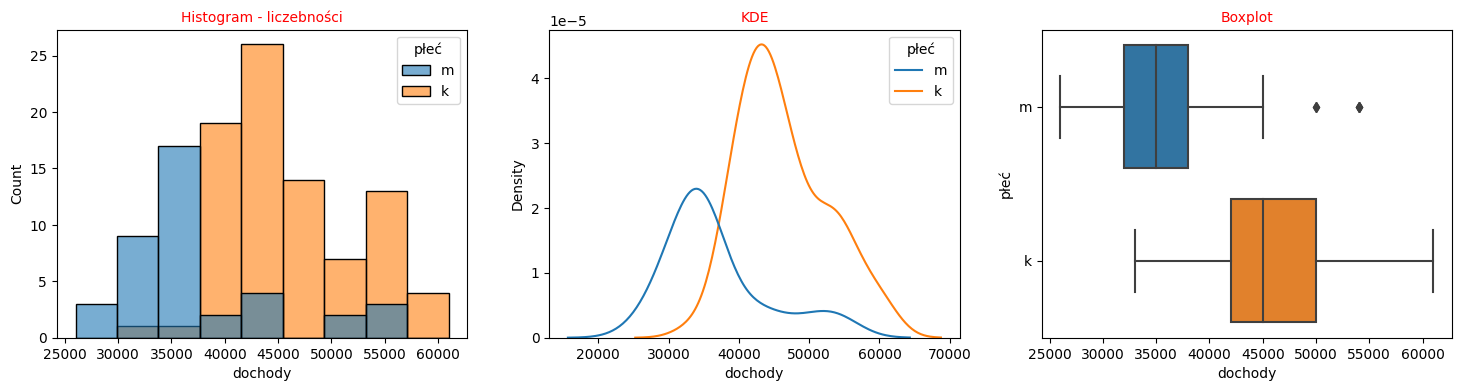

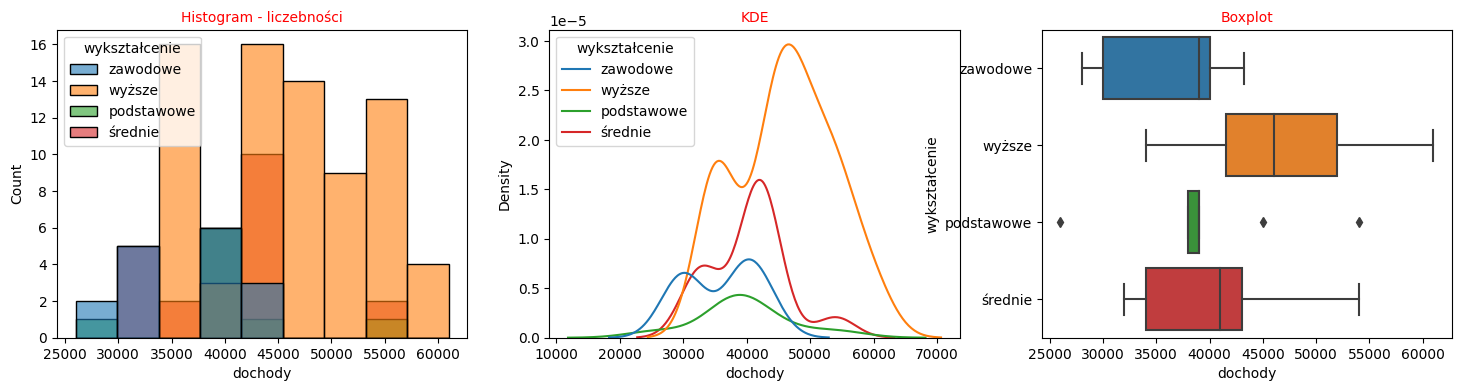

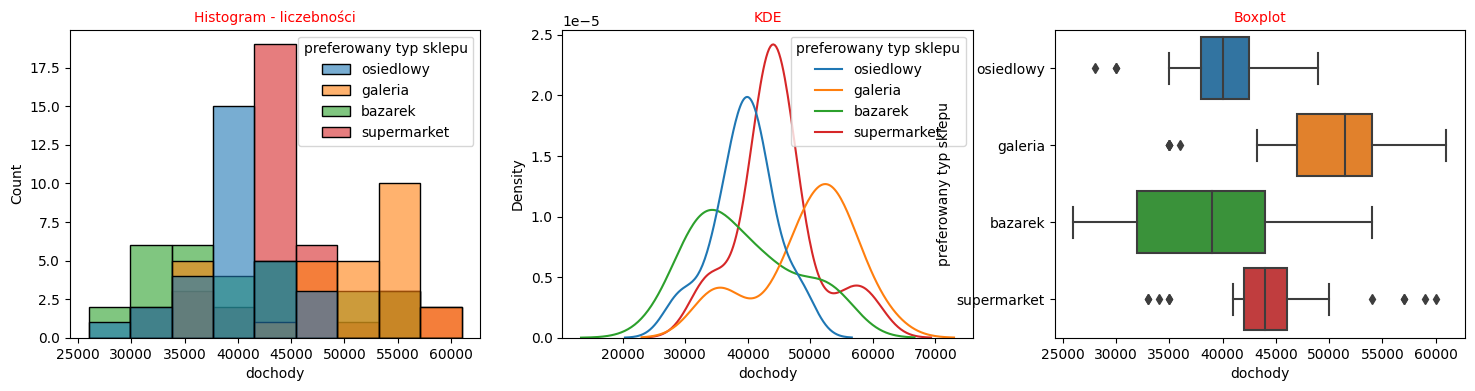

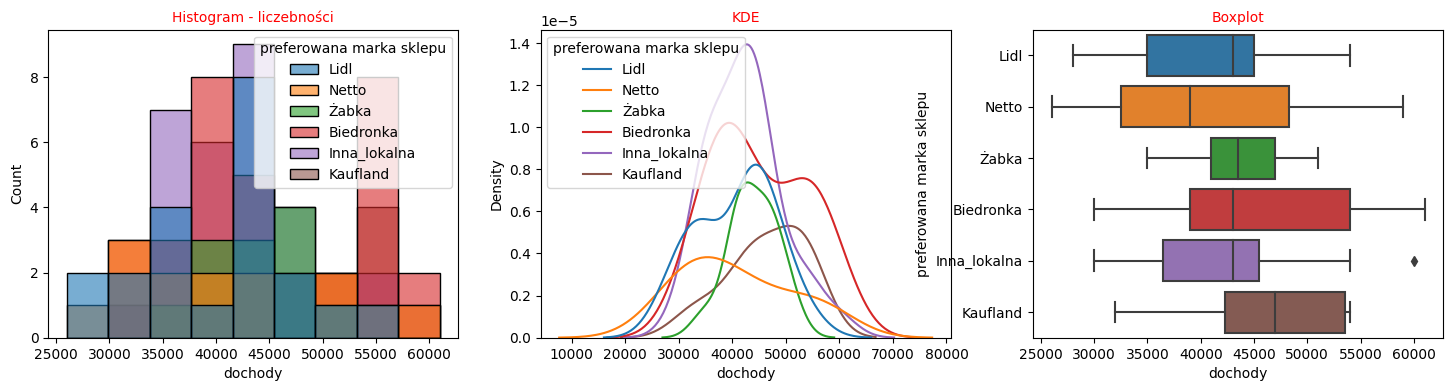

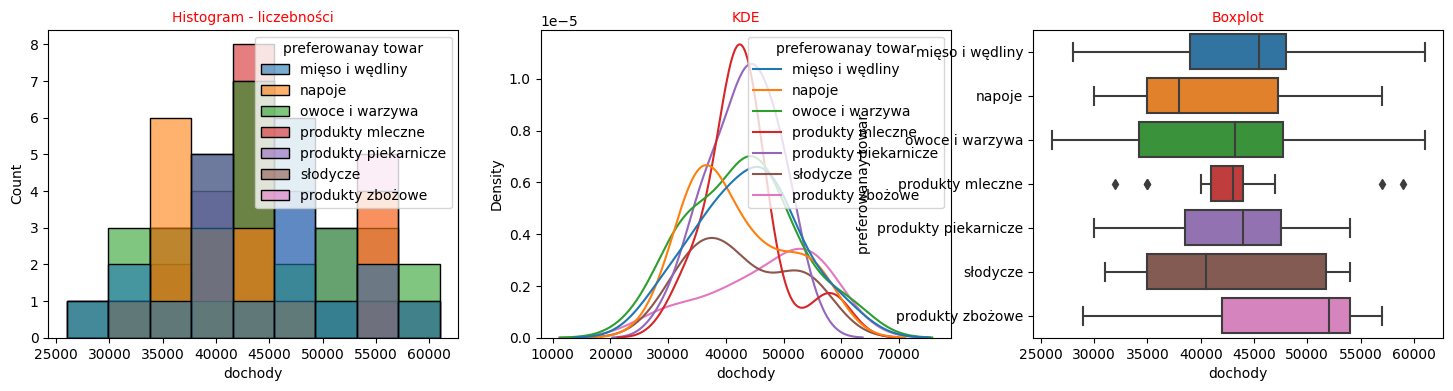

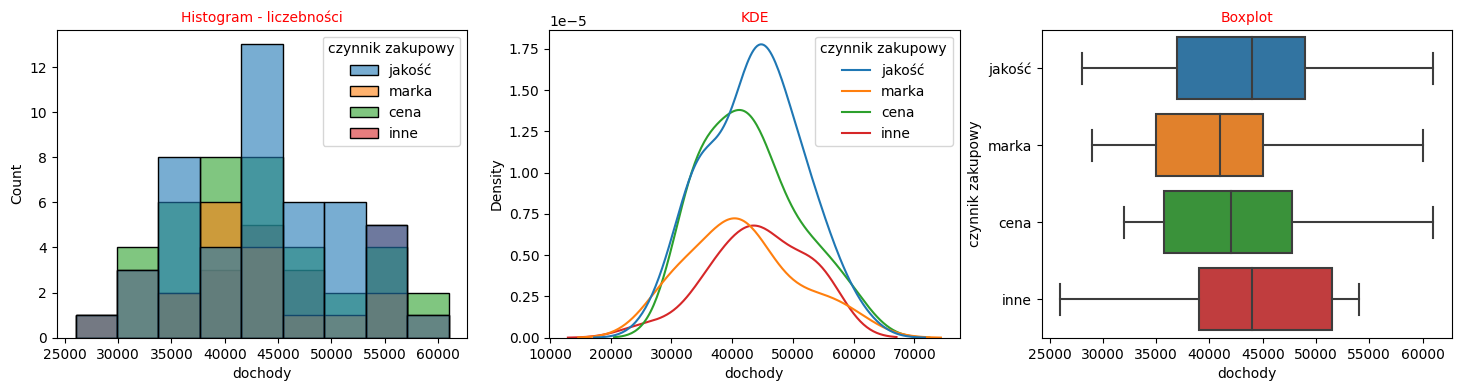

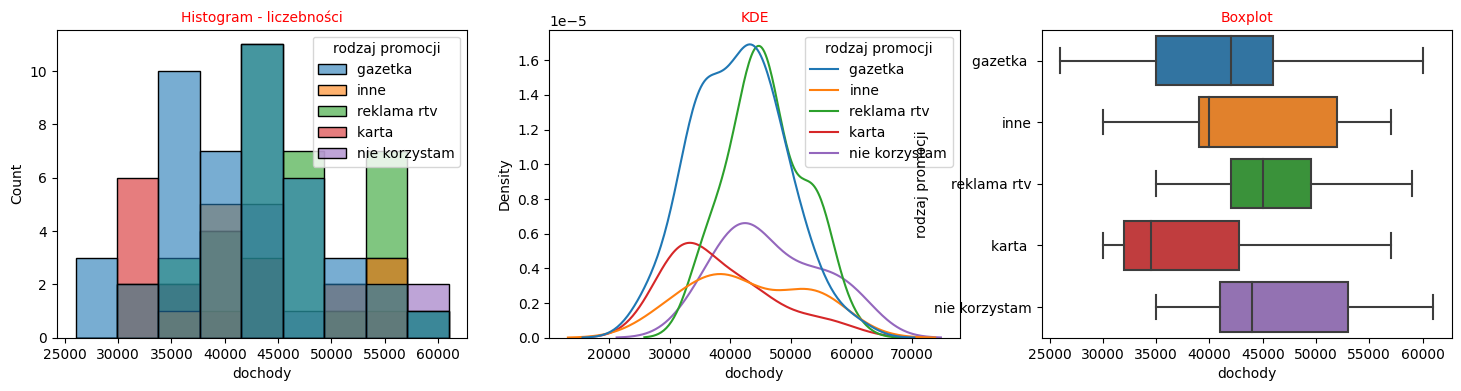

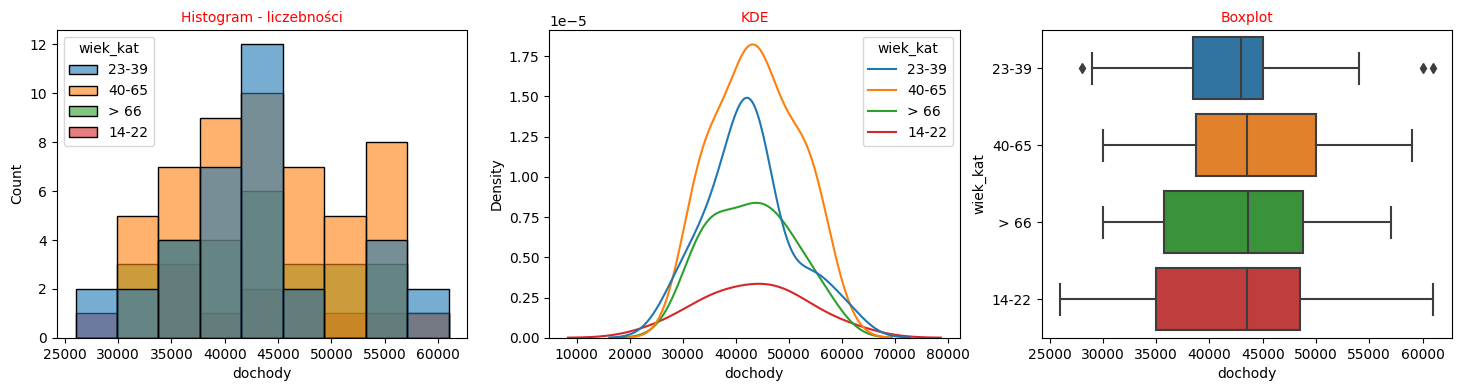

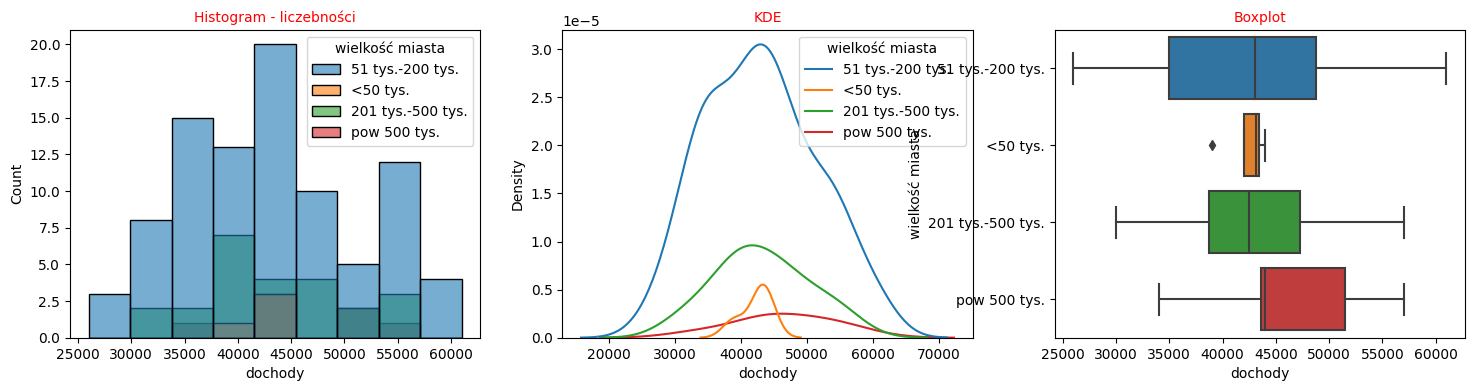

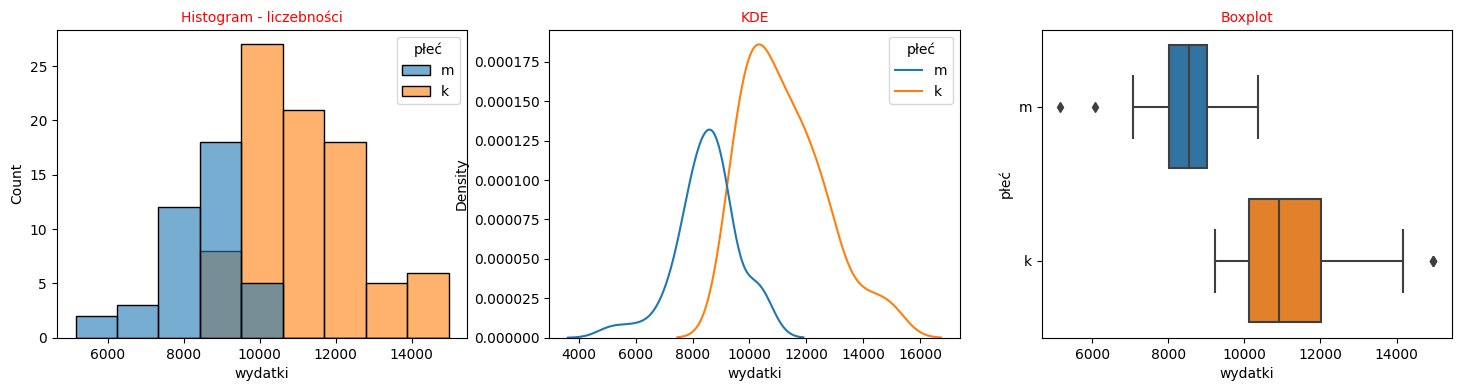

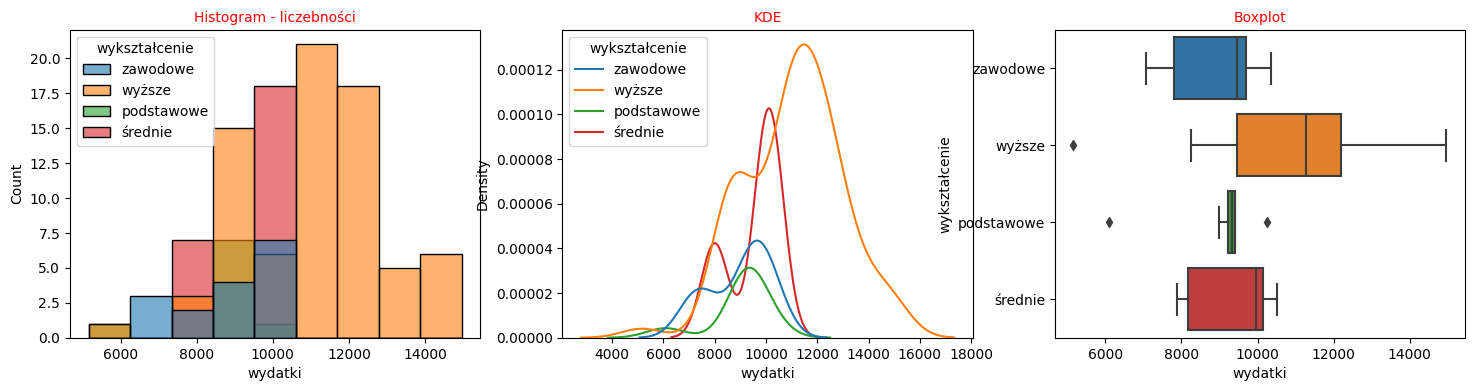

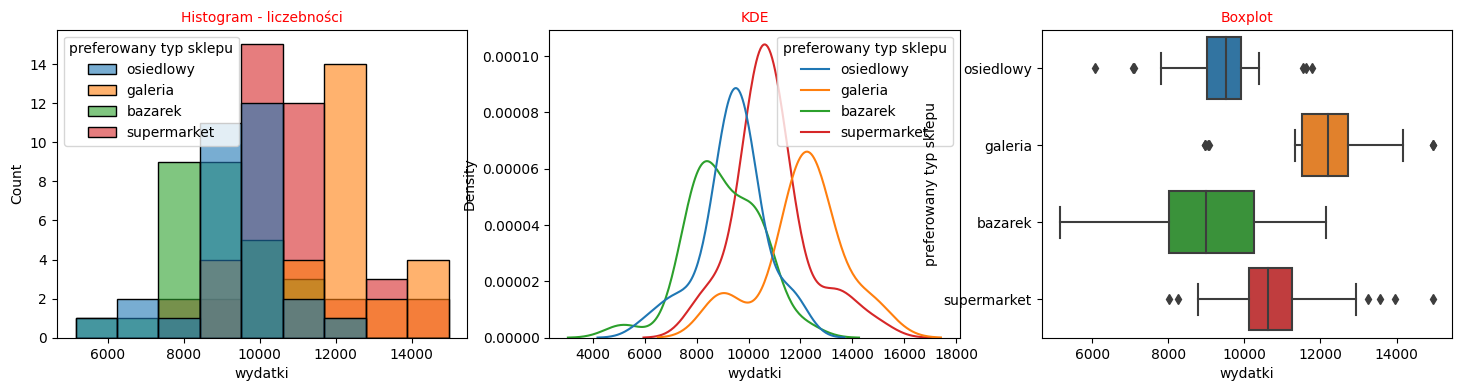

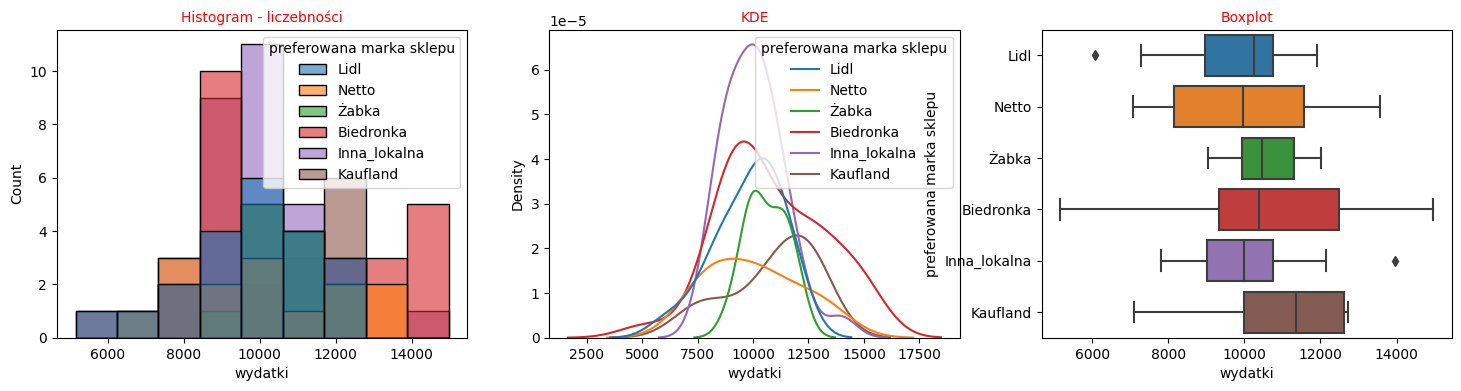

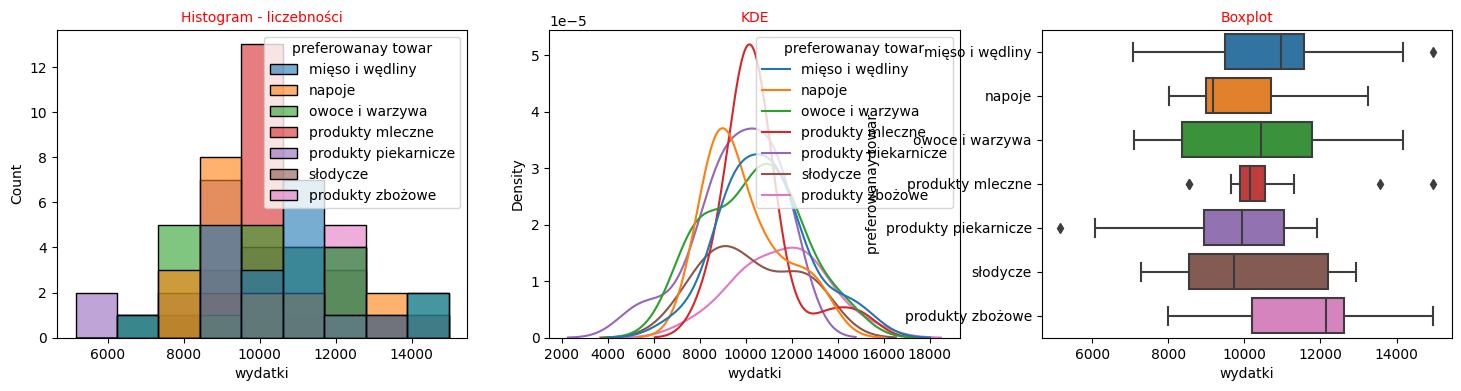

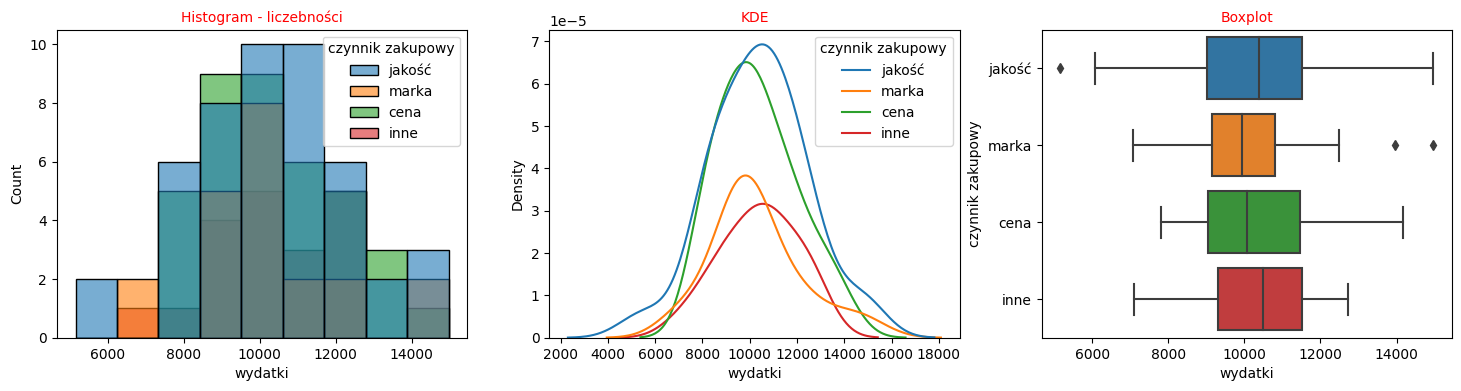

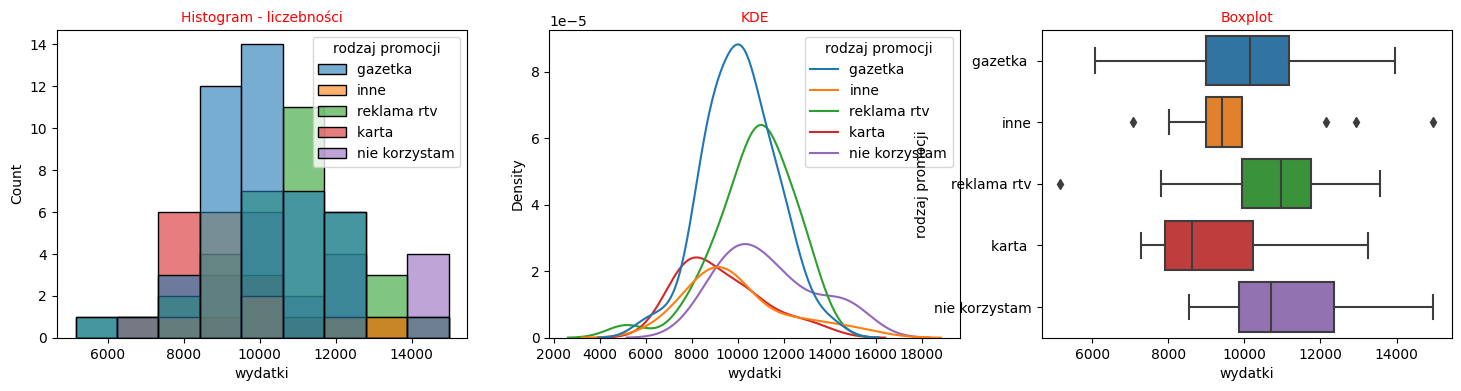

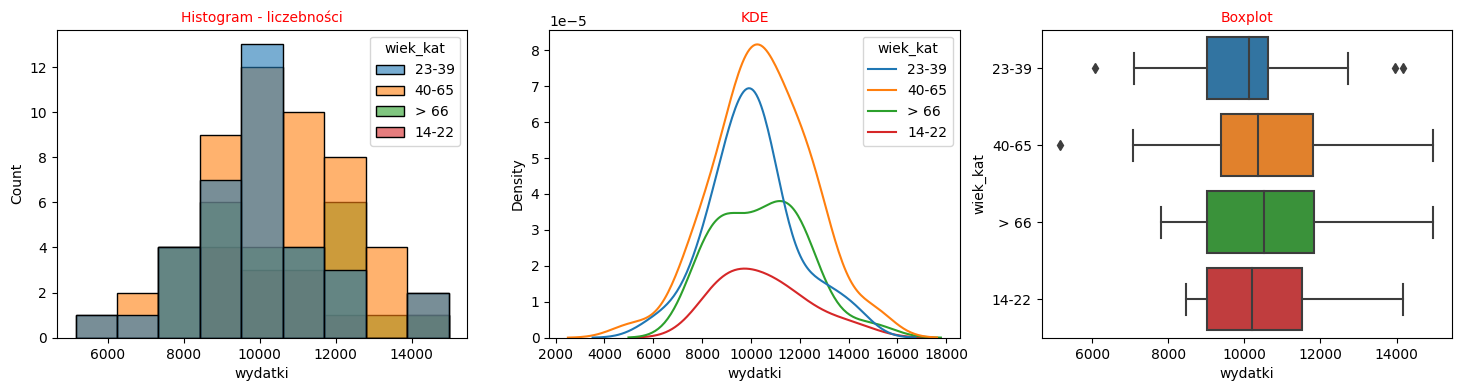

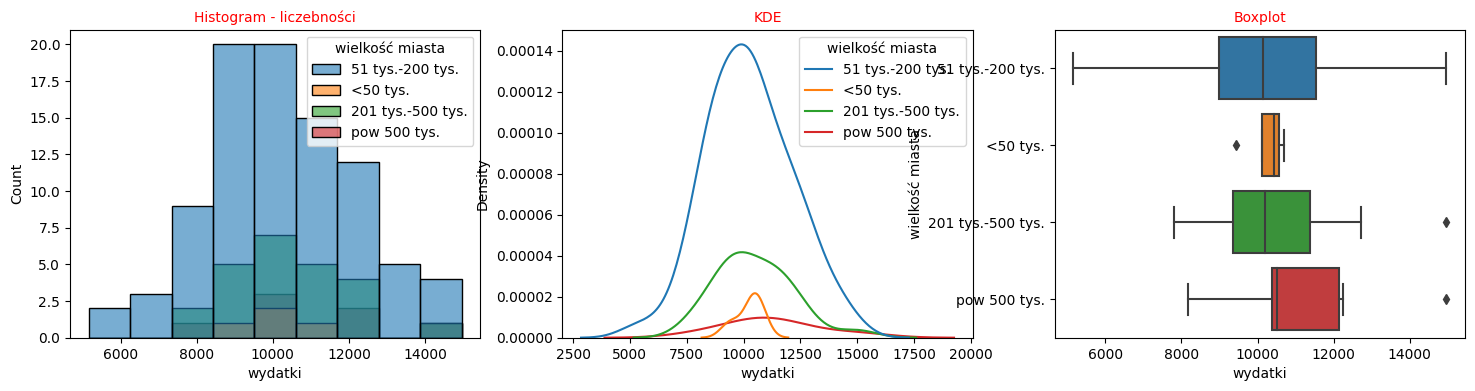

In [128]:

zmienna_tekstowa= ['płeć', 'wykształcenie',
 'preferowany typ sklepu','preferowana marka sklepu', 'preferowanay towar', 'czynnik zakupowy',
 'rodzaj promocji', 'wiek_kat','wielkość miasta']

for element in zmienna_tekstowa:
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    axes[0].set_title("Histogram - liczebności", color='red', fontsize=10)
    sns.histplot(dane, x='dochody', stat='count',  hue = element,bins=9, fill=True, color="black", alpha=0.6, ax=axes[0])
    axes[1].set_title("KDE", color='red', fontsize=10)
    sns.kdeplot(dane, x='dochody',hue = element, label = True,ax=axes[1])
    axes[2].set_title("Boxplot", color='red', fontsize=10)
    sns.boxplot(dane, x='dochody', y = element, ax=axes[2], orient='h')


for element in zmienna_tekstowa:
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))
    axes[0].set_title("Histogram - liczebności", color='red', fontsize=10)
    sns.histplot(dane, x='wydatki', stat='count',  hue = element,bins=9, fill=True, color="black", alpha=0.6, ax=axes[0])
    axes[1].set_title("KDE", color='red', fontsize=10)
    sns.kdeplot(dane, x='wydatki',hue = element, label = True,ax=axes[1])
    axes[2].set_title("Boxplot", color='red', fontsize=10)
    sns.boxplot(dane, x='wydatki', y = element, ax=axes[2], orient='h')


### **2.4. Analiza zależnosci zmiennych numerycznych**

#### 2.4.1. Tablica korelacji

In [129]:
print('Macierz Korelacji')
corr_matrix = dane[['dochody', 'wydatki']].corr().round(2)
display(corr_matrix)


Macierz Korelacji


,dochody,wydatki
dochody,1.00,0.74
wydatki,0.74,1.00


#### 2.4.2. Wykres korelacji i rozrzutu

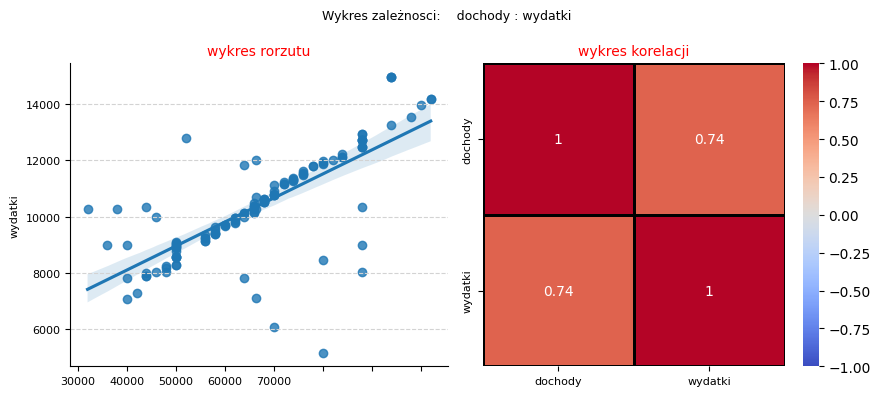

In [130]:
def num_plot2(df, num1,num2):
    fig, axs = plt.subplots(1, 2, figsize=(9, 4))
    df = df[[num1,num2]]
    corr = df.corr()
    x = df[num1]
    y = df[num2]
    plt.suptitle(f' Wykres zależnosci:    {num1} : {num2}', fontsize=9, color='black')
    axs[0].set_title("wykres rorzutu", color='red', fontsize=10)
    sns.regplot(data=dane, x=num1, y=num2,ax=axs[0])
    axs[1].set_title("wykres korelacji", color='red', fontsize=10)
    sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black',ax=axs[1])
    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0, fontsize=8)
    axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0, fontsize=8)
    axs[0].tick_params(axis='both', which='major', labelsize=8)
    axs[1].tick_params(axis='both', which='major', labelsize=8)
    axs[0].grid(axis='y', linestyle='--', color='lightgray')
    for ax in axs:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.xaxis.label.set_visible(False)
        ax.yaxis.label.set_size(8)
    plt.tight_layout()
    plt.show()


num_plot2(dane, 'dochody', 'wydatki')

###  **2.5 Analiza zależnosci zmiennych kategorialnych**
####  2.5.1 Tabele kontyngencji


In [131]:
def rozklady_cat(df, cat1, cat2, widok):

    if widok == 'licz_all':
        print('liczebności:')
        t = pd.crosstab(df[cat1], df[cat2], margins=True, margins_name="Razem")
    elif widok == 'proc_all': 
        print('częstości całkowite %:')
        t = (pd.crosstab(df[cat1], df[cat2], dropna=False, normalize='all', margins=True, margins_name='suma')*100).round(2)
    elif widok == 'proc_col':
        print('częstości wg kolumn %: ')
        t = (pd.crosstab(df[cat1], df[cat2], dropna=False, normalize='columns')*100).round(2)
    elif widok == 'proc_row':
        print('częstosci wg wierszy %:')
        t = (pd.crosstab(df[cat1], df[cat2], dropna=False, normalize='index', margins_name='suma')*100).round(2)
    return t


import itertools

lista = ['płeć', 'wykształcenie', 'preferowany typ sklepu', 'preferowana marka sklepu', 
         'czynnik zakupowy', 'rodzaj promocji', 'wiek_kat', 'wielkość miasta']
lista2 = ['dochody_kat', 'wydatki_kat']

for element1, element2 in itertools.product(lista, lista2):
    display(rozklady_cat(dane, element1, element2, 'licz_all'))
    print()
    display(rozklady_cat(dane, element1, element2, 'proc_all'))
    print()
    display(rozklady_cat(dane, element1, element2, 'proc_all'))
    print()
    display(rozklady_cat(dane, element1, element2, 'proc_row'))
    print()




liczebności:


dochody_kat,bardzo wysoki,niski,wysoki,średni,Razem
płeć,,,,,
k,26,5,27,27,85
m,5,31,3,1,40
Razem,31,36,30,28,125



częstości całkowite %:


dochody_kat,bardzo wysoki,niski,wysoki,średni,suma
płeć,,,,,
k,20.8,4.0,21.6,21.6,68.0
m,4.0,24.8,2.4,0.8,32.0
suma,24.8,28.8,24.0,22.4,100.0



częstości całkowite %:


dochody_kat,bardzo wysoki,niski,wysoki,średni,suma
płeć,,,,,
k,20.8,4.0,21.6,21.6,68.0
m,4.0,24.8,2.4,0.8,32.0
suma,24.8,28.8,24.0,22.4,100.0



częstosci wg wierszy %:


dochody_kat,bardzo wysoki,niski,wysoki,średni
płeć,,,,
k,30.59,5.88,31.76,31.76
m,12.50,77.50,7.50,2.50



liczebności:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,Razem
płeć,,,,,
k,31,0,29,25,85
m,0,32,2,6,40
Razem,31,32,31,31,125



częstości całkowite %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,suma
płeć,,,,,
k,24.8,0.0,23.2,20.0,68.0
m,0.0,25.6,1.6,4.8,32.0
suma,24.8,25.6,24.8,24.8,100.0



częstości całkowite %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,suma
płeć,,,,,
k,24.8,0.0,23.2,20.0,68.0
m,0.0,25.6,1.6,4.8,32.0
suma,24.8,25.6,24.8,24.8,100.0



częstosci wg wierszy %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni
płeć,,,,
k,36.47,0.0,34.12,29.41
m,0.00,80.0,5.00,15.00



liczebności:


dochody_kat,bardzo wysoki,niski,wysoki,średni,Razem
wykształcenie,,,,,
podstawowe,1,4,1,3,9
wyższe,28,18,27,2,75
zawodowe,0,7,2,7,16
średnie,2,7,0,16,25
Razem,31,36,30,28,125



częstości całkowite %:


dochody_kat,bardzo wysoki,niski,wysoki,średni,suma
wykształcenie,,,,,
podstawowe,0.8,3.2,0.8,2.4,7.2
wyższe,22.4,14.4,21.6,1.6,60.0
zawodowe,0.0,5.6,1.6,5.6,12.8
średnie,1.6,5.6,0.0,12.8,20.0
suma,24.8,28.8,24.0,22.4,100.0



częstości całkowite %:


dochody_kat,bardzo wysoki,niski,wysoki,średni,suma
wykształcenie,,,,,
podstawowe,0.8,3.2,0.8,2.4,7.2
wyższe,22.4,14.4,21.6,1.6,60.0
zawodowe,0.0,5.6,1.6,5.6,12.8
średnie,1.6,5.6,0.0,12.8,20.0
suma,24.8,28.8,24.0,22.4,100.0



częstosci wg wierszy %:


dochody_kat,bardzo wysoki,niski,wysoki,średni
wykształcenie,,,,
podstawowe,11.11,44.44,11.11,33.33
wyższe,37.33,24.00,36.00,2.67
zawodowe,0.00,43.75,12.50,43.75
średnie,8.00,28.00,0.00,64.00



liczebności:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,Razem
wykształcenie,,,,,
podstawowe,0,2,0,7,9
wyższe,31,16,24,4,75
zawodowe,0,7,1,8,16
średnie,0,7,6,12,25
Razem,31,32,31,31,125



częstości całkowite %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,suma
wykształcenie,,,,,
podstawowe,0.0,1.6,0.0,5.6,7.2
wyższe,24.8,12.8,19.2,3.2,60.0
zawodowe,0.0,5.6,0.8,6.4,12.8
średnie,0.0,5.6,4.8,9.6,20.0
suma,24.8,25.6,24.8,24.8,100.0



częstości całkowite %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,suma
wykształcenie,,,,,
podstawowe,0.0,1.6,0.0,5.6,7.2
wyższe,24.8,12.8,19.2,3.2,60.0
zawodowe,0.0,5.6,0.8,6.4,12.8
średnie,0.0,5.6,4.8,9.6,20.0
suma,24.8,25.6,24.8,24.8,100.0



częstosci wg wierszy %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni
wykształcenie,,,,
podstawowe,0.00,22.22,0.00,77.78
wyższe,41.33,21.33,32.00,5.33
zawodowe,0.00,43.75,6.25,50.00
średnie,0.00,28.00,24.00,48.00



liczebności:


dochody_kat,bardzo wysoki,niski,wysoki,średni,Razem
preferowany typ sklepu,,,,,
bazarek,6,14,4,5,29
galeria,18,5,5,0,28
osiedlowy,1,12,4,13,30
supermarket,6,5,17,10,38
Razem,31,36,30,28,125



częstości całkowite %:


dochody_kat,bardzo wysoki,niski,wysoki,średni,suma
preferowany typ sklepu,,,,,
bazarek,4.8,11.2,3.2,4.0,23.2
galeria,14.4,4.0,4.0,0.0,22.4
osiedlowy,0.8,9.6,3.2,10.4,24.0
supermarket,4.8,4.0,13.6,8.0,30.4
suma,24.8,28.8,24.0,22.4,100.0



częstości całkowite %:


dochody_kat,bardzo wysoki,niski,wysoki,średni,suma
preferowany typ sklepu,,,,,
bazarek,4.8,11.2,3.2,4.0,23.2
galeria,14.4,4.0,4.0,0.0,22.4
osiedlowy,0.8,9.6,3.2,10.4,24.0
supermarket,4.8,4.0,13.6,8.0,30.4
suma,24.8,28.8,24.0,22.4,100.0



częstosci wg wierszy %:


dochody_kat,bardzo wysoki,niski,wysoki,średni
preferowany typ sklepu,,,,
bazarek,20.69,48.28,13.79,17.24
galeria,64.29,17.86,17.86,0.00
osiedlowy,3.33,40.00,13.33,43.33
supermarket,15.79,13.16,44.74,26.32



liczebności:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,Razem
preferowany typ sklepu,,,,,
bazarek,1,16,5,7,29
galeria,20,4,4,0,28
osiedlowy,3,8,3,16,30
supermarket,7,4,19,8,38
Razem,31,32,31,31,125



częstości całkowite %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,suma
preferowany typ sklepu,,,,,
bazarek,0.8,12.8,4.0,5.6,23.2
galeria,16.0,3.2,3.2,0.0,22.4
osiedlowy,2.4,6.4,2.4,12.8,24.0
supermarket,5.6,3.2,15.2,6.4,30.4
suma,24.8,25.6,24.8,24.8,100.0



częstości całkowite %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,suma
preferowany typ sklepu,,,,,
bazarek,0.8,12.8,4.0,5.6,23.2
galeria,16.0,3.2,3.2,0.0,22.4
osiedlowy,2.4,6.4,2.4,12.8,24.0
supermarket,5.6,3.2,15.2,6.4,30.4
suma,24.8,25.6,24.8,24.8,100.0



częstosci wg wierszy %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni
preferowany typ sklepu,,,,
bazarek,3.45,55.17,17.24,24.14
galeria,71.43,14.29,14.29,0.00
osiedlowy,10.00,26.67,10.00,53.33
supermarket,18.42,10.53,50.00,21.05



liczebności:


dochody_kat,bardzo wysoki,niski,wysoki,średni,Razem
preferowana marka sklepu,,,,,
Biedronka,12,8,4,9,33
Inna_lokalna,4,10,10,7,31
Kaufland,6,2,4,2,14
Lidl,3,8,7,3,21
Netto,4,7,1,2,14
Żabka,2,1,4,5,12
Razem,31,36,30,28,125



częstości całkowite %:


dochody_kat,bardzo wysoki,niski,wysoki,średni,suma
preferowana marka sklepu,,,,,
Biedronka,9.6,6.4,3.2,7.2,26.4
Inna_lokalna,3.2,8.0,8.0,5.6,24.8
Kaufland,4.8,1.6,3.2,1.6,11.2
Lidl,2.4,6.4,5.6,2.4,16.8
Netto,3.2,5.6,0.8,1.6,11.2
Żabka,1.6,0.8,3.2,4.0,9.6
suma,24.8,28.8,24.0,22.4,100.0



częstości całkowite %:


dochody_kat,bardzo wysoki,niski,wysoki,średni,suma
preferowana marka sklepu,,,,,
Biedronka,9.6,6.4,3.2,7.2,26.4
Inna_lokalna,3.2,8.0,8.0,5.6,24.8
Kaufland,4.8,1.6,3.2,1.6,11.2
Lidl,2.4,6.4,5.6,2.4,16.8
Netto,3.2,5.6,0.8,1.6,11.2
Żabka,1.6,0.8,3.2,4.0,9.6
suma,24.8,28.8,24.0,22.4,100.0



częstosci wg wierszy %:


dochody_kat,bardzo wysoki,niski,wysoki,średni
preferowana marka sklepu,,,,
Biedronka,36.36,24.24,12.12,27.27
Inna_lokalna,12.90,32.26,32.26,22.58
Kaufland,42.86,14.29,28.57,14.29
Lidl,14.29,38.10,33.33,14.29
Netto,28.57,50.00,7.14,14.29
Żabka,16.67,8.33,33.33,41.67



liczebności:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,Razem
preferowana marka sklepu,,,,,
Biedronka,13,7,5,8,33
Inna_lokalna,3,9,9,10,31
Kaufland,6,3,4,1,14
Lidl,3,7,7,4,21
Netto,4,5,2,3,14
Żabka,2,1,4,5,12
Razem,31,32,31,31,125



częstości całkowite %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,suma
preferowana marka sklepu,,,,,
Biedronka,10.4,5.6,4.0,6.4,26.4
Inna_lokalna,2.4,7.2,7.2,8.0,24.8
Kaufland,4.8,2.4,3.2,0.8,11.2
Lidl,2.4,5.6,5.6,3.2,16.8
Netto,3.2,4.0,1.6,2.4,11.2
Żabka,1.6,0.8,3.2,4.0,9.6
suma,24.8,25.6,24.8,24.8,100.0



częstości całkowite %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,suma
preferowana marka sklepu,,,,,
Biedronka,10.4,5.6,4.0,6.4,26.4
Inna_lokalna,2.4,7.2,7.2,8.0,24.8
Kaufland,4.8,2.4,3.2,0.8,11.2
Lidl,2.4,5.6,5.6,3.2,16.8
Netto,3.2,4.0,1.6,2.4,11.2
Żabka,1.6,0.8,3.2,4.0,9.6
suma,24.8,25.6,24.8,24.8,100.0



częstosci wg wierszy %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni
preferowana marka sklepu,,,,
Biedronka,39.39,21.21,15.15,24.24
Inna_lokalna,9.68,29.03,29.03,32.26
Kaufland,42.86,21.43,28.57,7.14
Lidl,14.29,33.33,33.33,19.05
Netto,28.57,35.71,14.29,21.43
Żabka,16.67,8.33,33.33,41.67



liczebności:


dochody_kat,bardzo wysoki,niski,wysoki,średni,Razem
czynnik zakupowy,,,,,
cena,9,12,8,9,38
inne,6,4,6,3,19
jakość,12,13,14,8,47
marka,4,7,2,8,21
Razem,31,36,30,28,125



częstości całkowite %:


dochody_kat,bardzo wysoki,niski,wysoki,średni,suma
czynnik zakupowy,,,,,
cena,7.2,9.6,6.4,7.2,30.4
inne,4.8,3.2,4.8,2.4,15.2
jakość,9.6,10.4,11.2,6.4,37.6
marka,3.2,5.6,1.6,6.4,16.8
suma,24.8,28.8,24.0,22.4,100.0



częstości całkowite %:


dochody_kat,bardzo wysoki,niski,wysoki,średni,suma
czynnik zakupowy,,,,,
cena,7.2,9.6,6.4,7.2,30.4
inne,4.8,3.2,4.8,2.4,15.2
jakość,9.6,10.4,11.2,6.4,37.6
marka,3.2,5.6,1.6,6.4,16.8
suma,24.8,28.8,24.0,22.4,100.0



częstosci wg wierszy %:


dochody_kat,bardzo wysoki,niski,wysoki,średni
czynnik zakupowy,,,,
cena,23.68,31.58,21.05,23.68
inne,31.58,21.05,31.58,15.79
jakość,25.53,27.66,29.79,17.02
marka,19.05,33.33,9.52,38.10



liczebności:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,Razem
czynnik zakupowy,,,,,
cena,9,10,9,10,38
inne,5,4,6,4,19
jakość,12,13,12,10,47
marka,5,5,4,7,21
Razem,31,32,31,31,125



częstości całkowite %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,suma
czynnik zakupowy,,,,,
cena,7.2,8.0,7.2,8.0,30.4
inne,4.0,3.2,4.8,3.2,15.2
jakość,9.6,10.4,9.6,8.0,37.6
marka,4.0,4.0,3.2,5.6,16.8
suma,24.8,25.6,24.8,24.8,100.0



częstości całkowite %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,suma
czynnik zakupowy,,,,,
cena,7.2,8.0,7.2,8.0,30.4
inne,4.0,3.2,4.8,3.2,15.2
jakość,9.6,10.4,9.6,8.0,37.6
marka,4.0,4.0,3.2,5.6,16.8
suma,24.8,25.6,24.8,24.8,100.0



częstosci wg wierszy %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni
czynnik zakupowy,,,,
cena,23.68,26.32,23.68,26.32
inne,26.32,21.05,31.58,21.05
jakość,25.53,27.66,25.53,21.28
marka,23.81,23.81,19.05,33.33



liczebności:


dochody_kat,bardzo wysoki,niski,wysoki,średni,Razem
rodzaj promocji,,,,,
gazetka,7,17,11,10,45
inne,5,3,0,5,13
karta,2,8,1,3,14
nie korzystam,8,3,3,5,19
reklama rtv,9,5,15,5,34
Razem,31,36,30,28,125



częstości całkowite %:


dochody_kat,bardzo wysoki,niski,wysoki,średni,suma
rodzaj promocji,,,,,
gazetka,5.6,13.6,8.8,8.0,36.0
inne,4.0,2.4,0.0,4.0,10.4
karta,1.6,6.4,0.8,2.4,11.2
nie korzystam,6.4,2.4,2.4,4.0,15.2
reklama rtv,7.2,4.0,12.0,4.0,27.2
suma,24.8,28.8,24.0,22.4,100.0



częstości całkowite %:


dochody_kat,bardzo wysoki,niski,wysoki,średni,suma
rodzaj promocji,,,,,
gazetka,5.6,13.6,8.8,8.0,36.0
inne,4.0,2.4,0.0,4.0,10.4
karta,1.6,6.4,0.8,2.4,11.2
nie korzystam,6.4,2.4,2.4,4.0,15.2
reklama rtv,7.2,4.0,12.0,4.0,27.2
suma,24.8,28.8,24.0,22.4,100.0



częstosci wg wierszy %:


dochody_kat,bardzo wysoki,niski,wysoki,średni
rodzaj promocji,,,,
gazetka,15.56,37.78,24.44,22.22
inne,38.46,23.08,0.00,38.46
karta,14.29,57.14,7.14,21.43
nie korzystam,42.11,15.79,15.79,26.32
reklama rtv,26.47,14.71,44.12,14.71



liczebności:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,Razem
rodzaj promocji,,,,,
gazetka,8,13,11,13,45
inne,3,5,0,5,13
karta,2,7,2,3,14
nie korzystam,8,2,5,4,19
reklama rtv,10,5,13,6,34
Razem,31,32,31,31,125



częstości całkowite %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,suma
rodzaj promocji,,,,,
gazetka,6.4,10.4,8.8,10.4,36.0
inne,2.4,4.0,0.0,4.0,10.4
karta,1.6,5.6,1.6,2.4,11.2
nie korzystam,6.4,1.6,4.0,3.2,15.2
reklama rtv,8.0,4.0,10.4,4.8,27.2
suma,24.8,25.6,24.8,24.8,100.0



częstości całkowite %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,suma
rodzaj promocji,,,,,
gazetka,6.4,10.4,8.8,10.4,36.0
inne,2.4,4.0,0.0,4.0,10.4
karta,1.6,5.6,1.6,2.4,11.2
nie korzystam,6.4,1.6,4.0,3.2,15.2
reklama rtv,8.0,4.0,10.4,4.8,27.2
suma,24.8,25.6,24.8,24.8,100.0



częstosci wg wierszy %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni
rodzaj promocji,,,,
gazetka,17.78,28.89,24.44,28.89
inne,23.08,38.46,0.00,38.46
karta,14.29,50.00,14.29,21.43
nie korzystam,42.11,10.53,26.32,21.05
reklama rtv,29.41,14.71,38.24,17.65



liczebności:


dochody_kat,bardzo wysoki,niski,wysoki,średni,Razem
wiek_kat,,,,,
14-22,3,4,3,2,12
23-39,6,9,9,11,35
40-65,15,13,11,13,52
> 66,7,10,7,2,26
Razem,31,36,30,28,125



częstości całkowite %:


dochody_kat,bardzo wysoki,niski,wysoki,średni,suma
wiek_kat,,,,,
14-22,2.4,3.2,2.4,1.6,9.6
23-39,4.8,7.2,7.2,8.8,28.0
40-65,12.0,10.4,8.8,10.4,41.6
> 66,5.6,8.0,5.6,1.6,20.8
suma,24.8,28.8,24.0,22.4,100.0



częstości całkowite %:


dochody_kat,bardzo wysoki,niski,wysoki,średni,suma
wiek_kat,,,,,
14-22,2.4,3.2,2.4,1.6,9.6
23-39,4.8,7.2,7.2,8.8,28.0
40-65,12.0,10.4,8.8,10.4,41.6
> 66,5.6,8.0,5.6,1.6,20.8
suma,24.8,28.8,24.0,22.4,100.0



częstosci wg wierszy %:


dochody_kat,bardzo wysoki,niski,wysoki,średni
wiek_kat,,,,
14-22,25.00,33.33,25.00,16.67
23-39,17.14,25.71,25.71,31.43
40-65,28.85,25.00,21.15,25.00
> 66,26.92,38.46,26.92,7.69



liczebności:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,Razem
wiek_kat,,,,,
14-22,3,4,2,3,12
23-39,5,10,9,11,35
40-65,14,11,14,13,52
> 66,9,7,6,4,26
Razem,31,32,31,31,125



częstości całkowite %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,suma
wiek_kat,,,,,
14-22,2.4,3.2,1.6,2.4,9.6
23-39,4.0,8.0,7.2,8.8,28.0
40-65,11.2,8.8,11.2,10.4,41.6
> 66,7.2,5.6,4.8,3.2,20.8
suma,24.8,25.6,24.8,24.8,100.0



częstości całkowite %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,suma
wiek_kat,,,,,
14-22,2.4,3.2,1.6,2.4,9.6
23-39,4.0,8.0,7.2,8.8,28.0
40-65,11.2,8.8,11.2,10.4,41.6
> 66,7.2,5.6,4.8,3.2,20.8
suma,24.8,25.6,24.8,24.8,100.0



częstosci wg wierszy %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni
wiek_kat,,,,
14-22,25.00,33.33,16.67,25.00
23-39,14.29,28.57,25.71,31.43
40-65,26.92,21.15,26.92,25.00
> 66,34.62,26.92,23.08,15.38



liczebności:


dochody_kat,bardzo wysoki,niski,wysoki,średni,Razem
wielkość miasta,,,,,
201 tys.-500 tys.,5,6,6,7,24
51 tys.-200 tys.,23,29,19,19,90
<50 tys.,0,0,2,2,4
pow 500 tys.,3,1,3,0,7
Razem,31,36,30,28,125



częstości całkowite %:


dochody_kat,bardzo wysoki,niski,wysoki,średni,suma
wielkość miasta,,,,,
201 tys.-500 tys.,4.0,4.8,4.8,5.6,19.2
51 tys.-200 tys.,18.4,23.2,15.2,15.2,72.0
<50 tys.,0.0,0.0,1.6,1.6,3.2
pow 500 tys.,2.4,0.8,2.4,0.0,5.6
suma,24.8,28.8,24.0,22.4,100.0



częstości całkowite %:


dochody_kat,bardzo wysoki,niski,wysoki,średni,suma
wielkość miasta,,,,,
201 tys.-500 tys.,4.0,4.8,4.8,5.6,19.2
51 tys.-200 tys.,18.4,23.2,15.2,15.2,72.0
<50 tys.,0.0,0.0,1.6,1.6,3.2
pow 500 tys.,2.4,0.8,2.4,0.0,5.6
suma,24.8,28.8,24.0,22.4,100.0



częstosci wg wierszy %:


dochody_kat,bardzo wysoki,niski,wysoki,średni
wielkość miasta,,,,
201 tys.-500 tys.,20.83,25.00,25.00,29.17
51 tys.-200 tys.,25.56,32.22,21.11,21.11
<50 tys.,0.00,0.00,50.00,50.00
pow 500 tys.,42.86,14.29,42.86,0.00



liczebności:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,Razem
wielkość miasta,,,,,
201 tys.-500 tys.,5,4,7,8,24
51 tys.-200 tys.,23,27,19,21,90
<50 tys.,0,0,3,1,4
pow 500 tys.,3,1,2,1,7
Razem,31,32,31,31,125



częstości całkowite %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,suma
wielkość miasta,,,,,
201 tys.-500 tys.,4.0,3.2,5.6,6.4,19.2
51 tys.-200 tys.,18.4,21.6,15.2,16.8,72.0
<50 tys.,0.0,0.0,2.4,0.8,3.2
pow 500 tys.,2.4,0.8,1.6,0.8,5.6
suma,24.8,25.6,24.8,24.8,100.0



częstości całkowite %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni,suma
wielkość miasta,,,,,
201 tys.-500 tys.,4.0,3.2,5.6,6.4,19.2
51 tys.-200 tys.,18.4,21.6,15.2,16.8,72.0
<50 tys.,0.0,0.0,2.4,0.8,3.2
pow 500 tys.,2.4,0.8,1.6,0.8,5.6
suma,24.8,25.6,24.8,24.8,100.0



częstosci wg wierszy %:


wydatki_kat,bardzo wysoki,niski,wysoki,średni
wielkość miasta,,,,
201 tys.-500 tys.,20.83,16.67,29.17,33.33
51 tys.-200 tys.,25.56,30.00,21.11,23.33
<50 tys.,0.00,0.00,75.00,25.00
pow 500 tys.,42.86,14.29,28.57,14.29


####  2.5.2 Wykresy

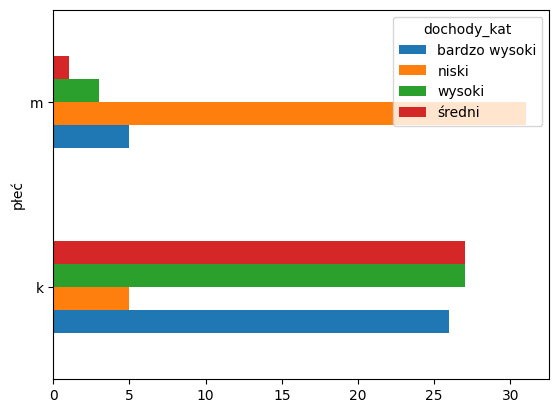

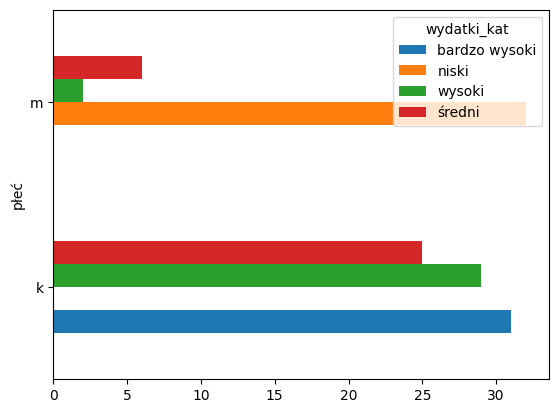

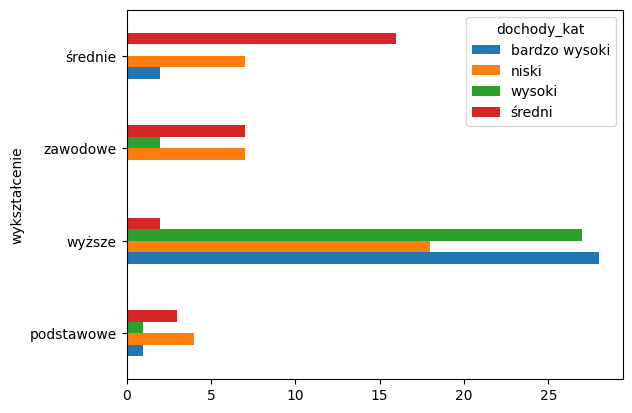

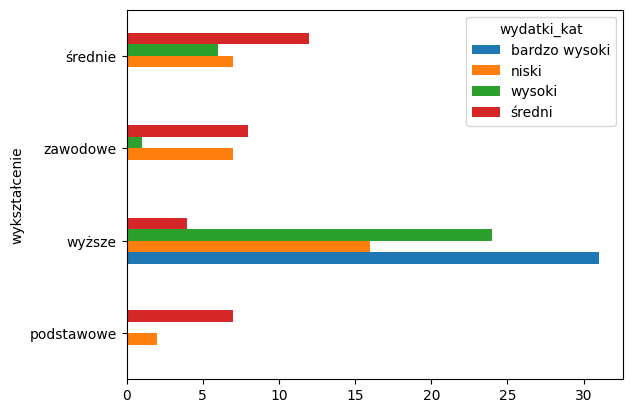

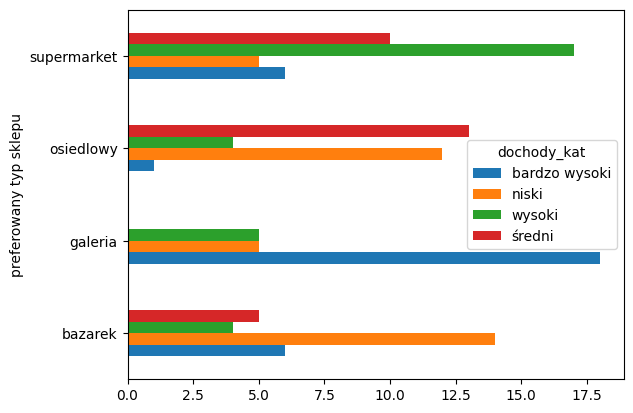

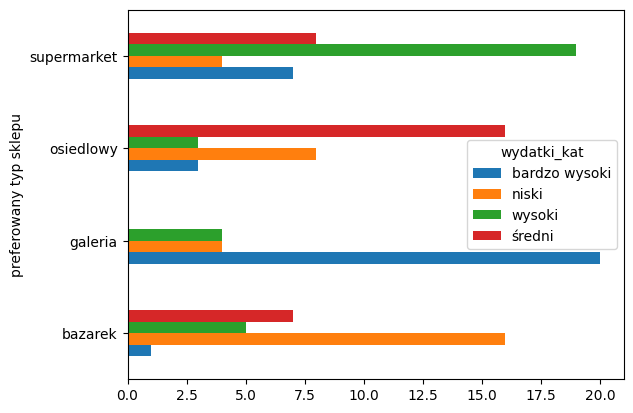

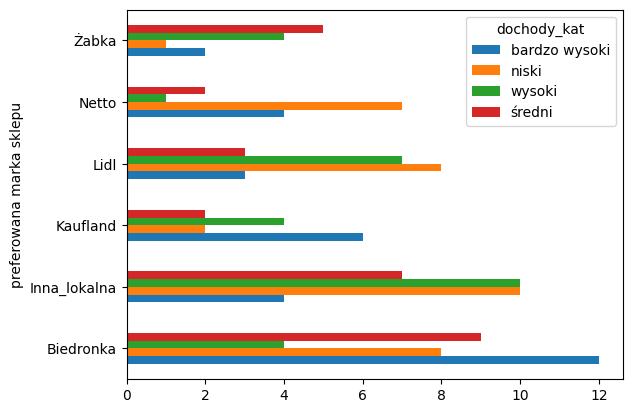

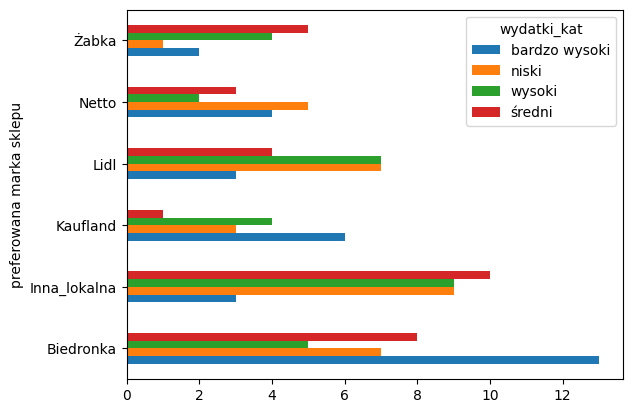

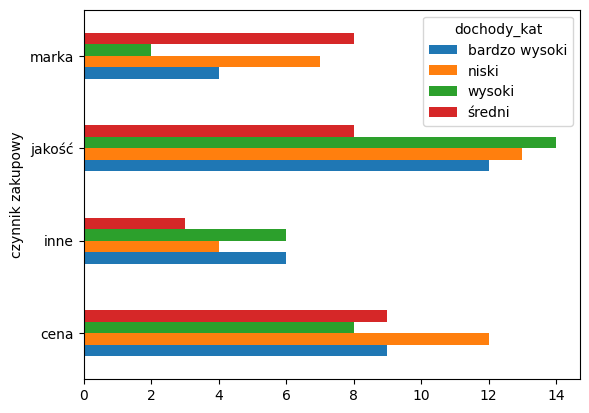

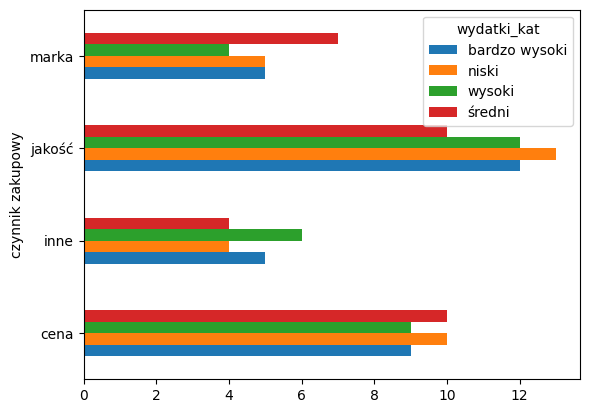

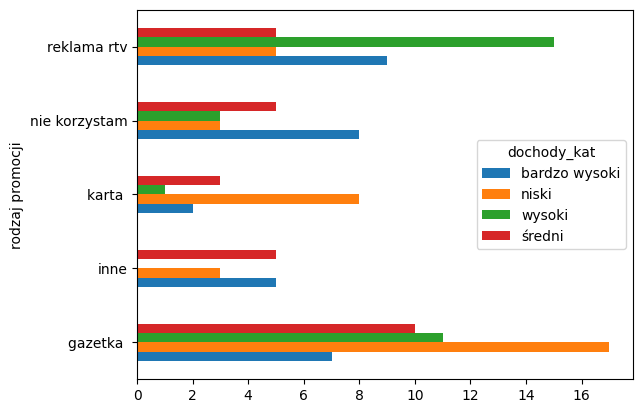

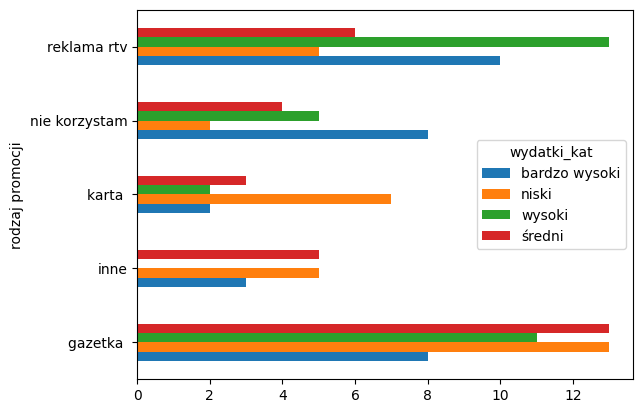

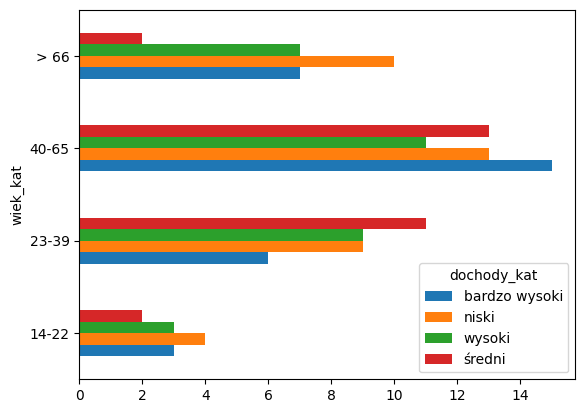

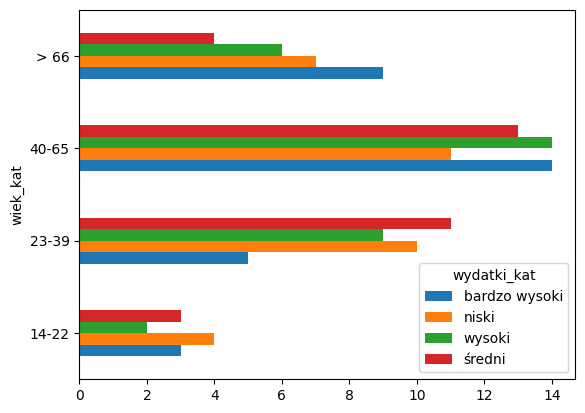

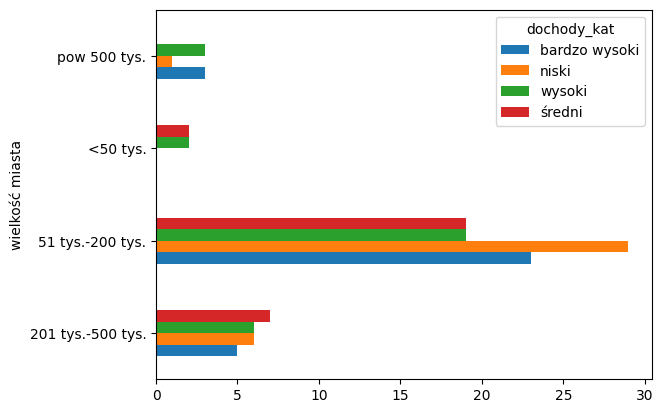

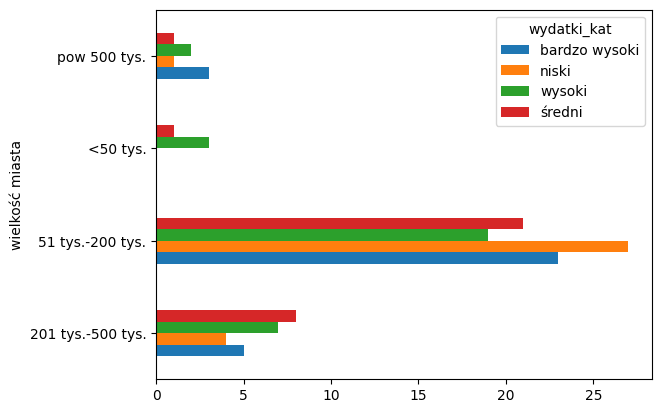

In [132]:
lista = ['płeć', 'wykształcenie', 'preferowany typ sklepu', 'preferowana marka sklepu', 
         'czynnik zakupowy', 'rodzaj promocji', 'wiek_kat', 'wielkość miasta']
lista2 = ['dochody_kat', 'wydatki_kat']

for element1, element2 in itertools.product(lista, lista2):
    pd.crosstab(dane[element1], dane[element2], margins=False).plot(kind='barh')


####  2.5.3 Miary zależnosci zmiennych kategorialnych

In [133]:
import pandas as pd
import numpy as np
import math
from scipy.stats import chi2_contingency
import itertools

def korelacje_nom(df, var1, var2):
    """ 'phi' - phi Yule'a, 'cp' - C-Pearsona, 'v' - V-Cramera,'t' - T-Czuprowa, 'c' - Cohena """
    table = pd.crosstab(df[var1], df[var2])
    df2 = df[[var1, var2]]
    chi2, p, dof, expected = chi2_contingency(table)
    N = df.shape[0]  # liczba elementow/obserwacji
    r = table.shape[0]  # liczba wierszy w tabeli kontyngencji.
    k = table.shape[1]  # liczba kolumn w tabeli kontyngencji,
    phi = (chi2 / N).round(3)
    C_pearson = np.round(math.sqrt(chi2 / (chi2 + N)), 3)
    V_cramer = np.round(math.sqrt(chi2 / (N * min(k - 1, r - 1))), 3)
    T_czuprow = np.round(math.sqrt(chi2 / (N * np.sqrt((r - 1) * (k - 1)))), 3)
    Cohen = np.round(V_cramer * (math.sqrt(min(k - 1, r - 1) - 1)), 3)
    
    # Tworzenie listy wyników
    results = [{'Measure': 'Phi Yule\'a', 'Value': phi},
               {'Measure': 'C-Pearsona', 'Value': C_pearson},
               {'Measure': 'V-Cramera', 'Value': V_cramer},
               {'Measure': 'T-Czuprowa', 'Value': T_czuprow},
               {'Measure': 'Cohena', 'Value': Cohen}]
    
    # Tworzenie ramki danych z wynikami
    result_df = pd.DataFrame(results)
    
    return result_df



In [134]:

lista = ['płeć', 'wykształcenie', 'preferowany typ sklepu', 'preferowana marka sklepu', 'czynnik zakupowy', 'rodzaj promocji', 'wiek_kat', 'wielkość miasta']
lista2 = ['dochody_kat', 'wydatki_kat']



for element1, element2 in itertools.product(lista, lista2):
    print(f'{element1.upper()} - {element2.upper()}')
    print(korelacje_nom(dane, element1, element2))
    print('----------------------------------')


PŁEĆ - DOCHODY_KAT
      Measure  Value
0  Phi Yule'a  0.553
1  C-Pearsona  0.597
2   V-Cramera  0.744
3  T-Czuprowa  0.565
4      Cohena  0.000
----------------------------------
PŁEĆ - WYDATKI_KAT
      Measure  Value
0  Phi Yule'a  0.753
1  C-Pearsona  0.655
2   V-Cramera  0.868
3  T-Czuprowa  0.659
4      Cohena  0.000
----------------------------------
WYKSZTAŁCENIE - DOCHODY_KAT
      Measure  Value
0  Phi Yule'a  0.504
1  C-Pearsona  0.579
2   V-Cramera  0.410
3  T-Czuprowa  0.410
4      Cohena  0.580
----------------------------------
WYKSZTAŁCENIE - WYDATKI_KAT
      Measure  Value
0  Phi Yule'a  0.484
1  C-Pearsona  0.571
2   V-Cramera  0.402
3  T-Czuprowa  0.402
4      Cohena  0.569
----------------------------------
PREFEROWANY TYP SKLEPU - DOCHODY_KAT
      Measure  Value
0  Phi Yule'a  0.455
1  C-Pearsona  0.559
2   V-Cramera  0.389
3  T-Czuprowa  0.389
4      Cohena  0.550
----------------------------------
PREFEROWANY TYP SKLEPU - WYDATKI_KAT
      Measure  Value
0  Phi

###  2.6. Miary zależnosci zmiennych kateegorialnych i nominalnych

In [135]:

def korelacje_nom_num(df, var1, var2):
    """ df - tabela danych  
    var1 - zmienna nominalna 2 poziomowa   
    var2 - zmienna numeryczna wynik ->(-1,1) """
    groupby_cat = df.groupby(var1)[var2].mean()
    y0 = groupby_cat.iloc[0]
    y1 = groupby_cat.iloc[1]
    p = df[var1].value_counts() / df.shape[0]
    std = df[var2].std()
    Point_Biserial= np.round((y1 - y0) * np.sqrt(p[1] * (1 - p[1])) / std,3)
    print(f'współczynnik korelacji pomiędzy [{var1}] a [{var2}]  --> Point_Biserial = {Point_Biserial}')

korelacje_nom_num(dane, 'płeć', 'dochody')
korelacje_nom_num(dane, 'płeć', 'wydatki')

współczynnik korelacji pomiędzy [płeć] a [dochody]  --> Point_Biserial = -0.562
współczynnik korelacji pomiędzy [płeć] a [wydatki]  --> Point_Biserial = -0.691


###  **2.7. Analiza zależności zmiennych numerycznych wg poziomów zmienej kategorialnej**

#### 2.7.1. Tablica korelacji

In [136]:
# korelacje zmienne numeryczne w grupach (wg poziomów zmiennej kategorialnej)

def korelacje_num_nom(df, method,var_nom, *var):
    """
    pearson : standard correlation coefficient
    kendall : Kendall Tau correlation coefficient
    spearman : Spearman rank correlation
    """
    #fig, axs = plt.subplots(figsize=(9, 4))
    print(f'Macierz Korelacji  [metoda: "{method}"]')
    corr_matrix =df.groupby(var_nom)[list(var)].corr(method=method).round(2)
    #sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    return corr_matrix

In [137]:


lista0 = ['płeć', 'wykształcenie', 'preferowany typ sklepu', 'preferowana marka sklepu', 'czynnik zakupowy',
          'rodzaj promocji', 'wiek_kat', 'wielkość miasta']

# Iterowanie po liście zmiennych
for zmienna in lista0:
    # Obliczanie korelacji dla danej zmiennej
    korelacja = pd.DataFrame(dane.groupby(zmienna)[['dochody', 'wydatki']].corr()).iloc[0::2, -1]
    
    print(f'Korelacja pomiędzy dochodami a wydatkami dla zmiennej {zmienna}:')
    display(korelacja)
    print()



Korelacja pomiędzy dochodami a wydatkami dla zmiennej płeć:


płeć         
k     dochody    0.906979
m     dochody   -0.175780
Name: wydatki, dtype: float64


Korelacja pomiędzy dochodami a wydatkami dla zmiennej wykształcenie:


wykształcenie         
podstawowe     dochody   -0.511592
wyższe         dochody    0.817004
zawodowe       dochody    0.142001
średnie        dochody    0.542916
Name: wydatki, dtype: float64


Korelacja pomiędzy dochodami a wydatkami dla zmiennej preferowany typ sklepu:


preferowany typ sklepu         
bazarek                 dochody    0.132630
galeria                 dochody    0.858946
osiedlowy               dochody    0.553212
supermarket             dochody    0.943256
Name: wydatki, dtype: float64


Korelacja pomiędzy dochodami a wydatkami dla zmiennej preferowana marka sklepu:


preferowana marka sklepu         
Biedronka                 dochody    0.736408
Inna_lokalna              dochody    0.815688
Kaufland                  dochody    0.749144
Lidl                      dochody    0.358443
Netto                     dochody    0.895187
Żabka                     dochody    0.989059
Name: wydatki, dtype: float64


Korelacja pomiędzy dochodami a wydatkami dla zmiennej czynnik zakupowy:


czynnik zakupowy         
cena              dochody    0.850183
inne              dochody    0.460843
jakość            dochody    0.692022
marka             dochody    0.911966
Name: wydatki, dtype: float64


Korelacja pomiędzy dochodami a wydatkami dla zmiennej rodzaj promocji:


rodzaj promocji         
gazetka          dochody    0.689777
inne             dochody    0.728024
karta            dochody    0.992614
nie korzystam    dochody    0.971983
reklama rtv      dochody    0.382493
Name: wydatki, dtype: float64


Korelacja pomiędzy dochodami a wydatkami dla zmiennej wiek_kat:


wiek_kat         
14-22     dochody    0.711251
23-39     dochody    0.703188
40-65     dochody    0.767605
> 66      dochody    0.765623
Name: wydatki, dtype: float64


Korelacja pomiędzy dochodami a wydatkami dla zmiennej wielkość miasta:


wielkość miasta           
201 tys.-500 tys.  dochody    0.978131
51 tys.-200 tys.   dochody    0.676187
<50 tys.           dochody    0.958820
pow 500 tys.       dochody    0.975082
Name: wydatki, dtype: float64

#### 6.6.2. Wykres korelacji i rozrzutu

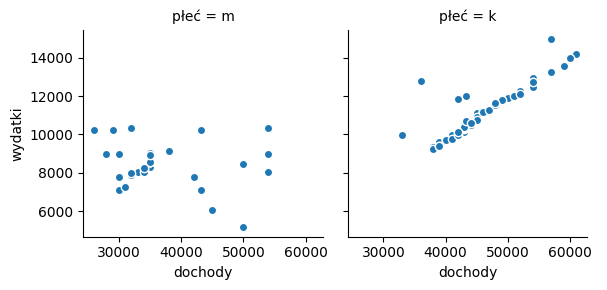

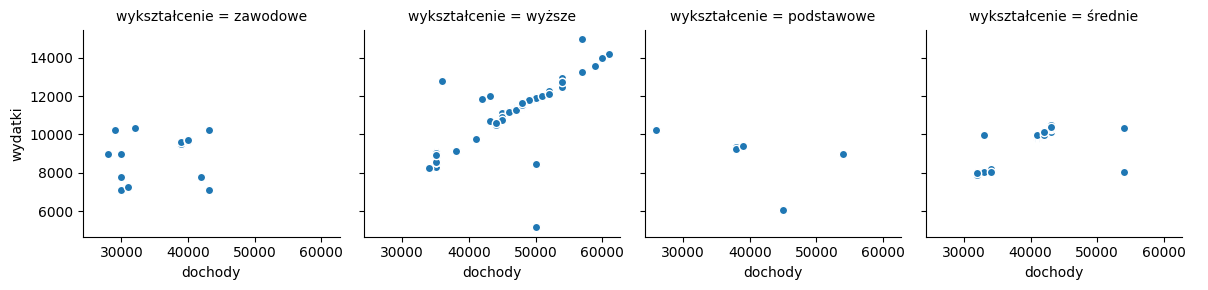

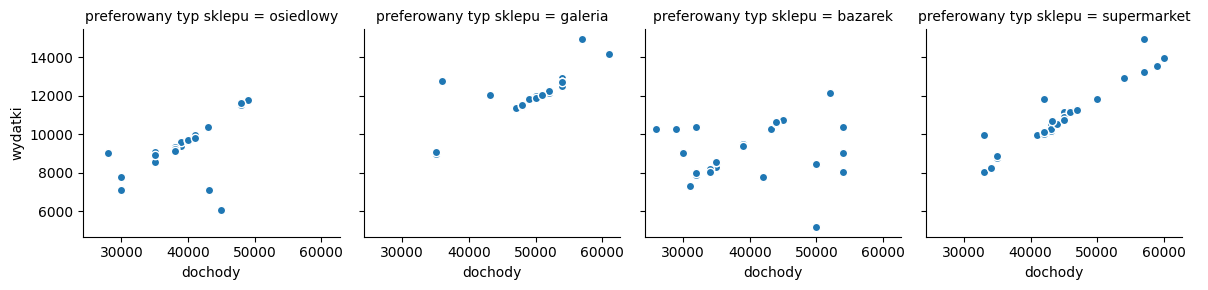

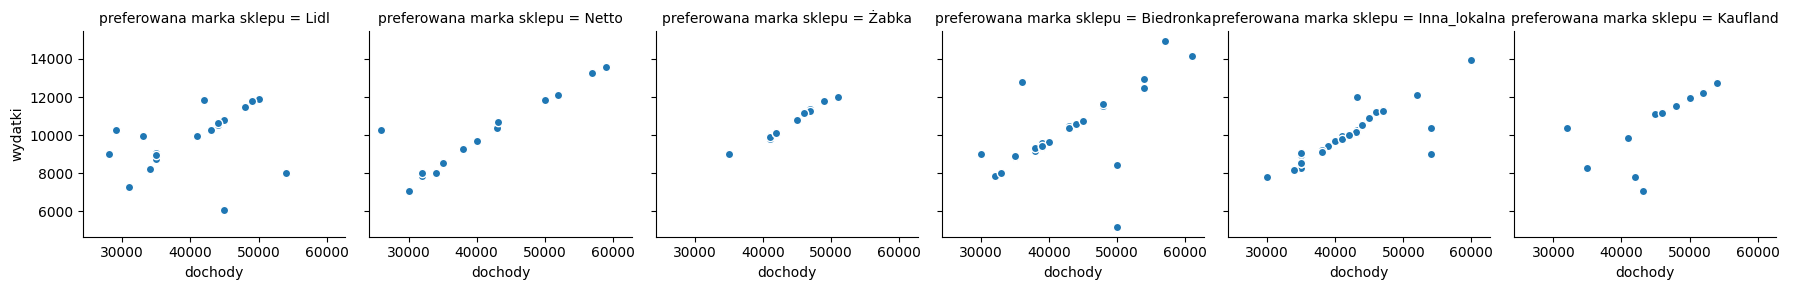

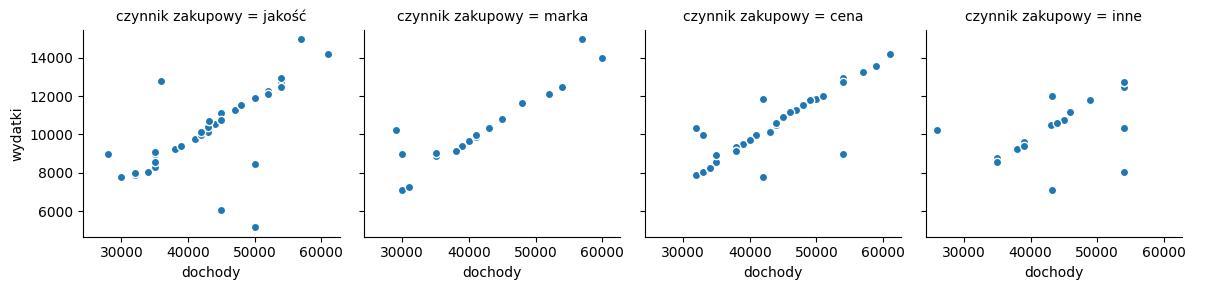

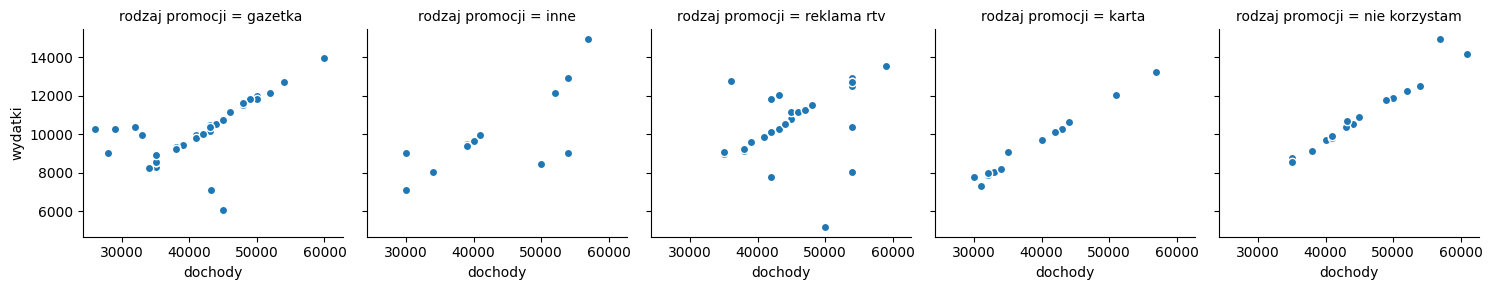

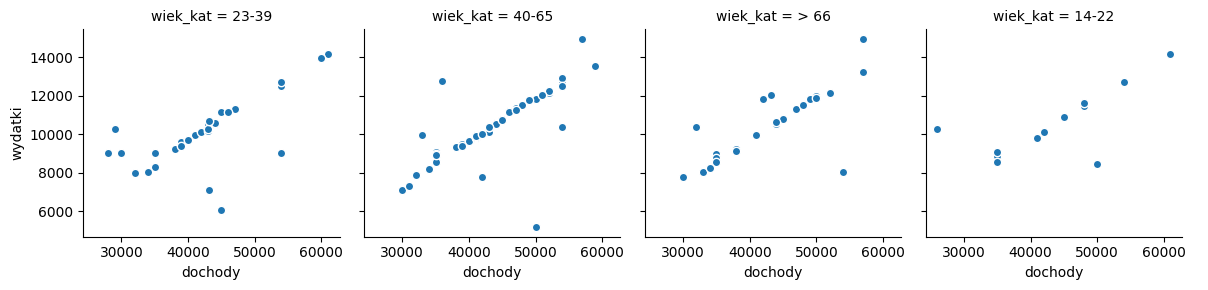

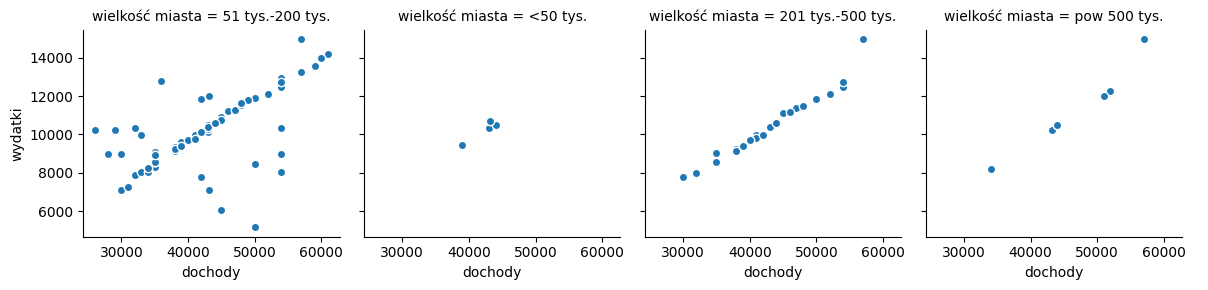

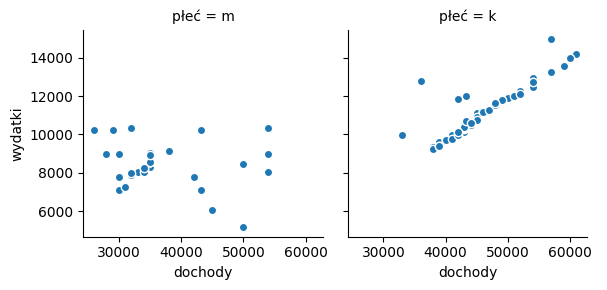

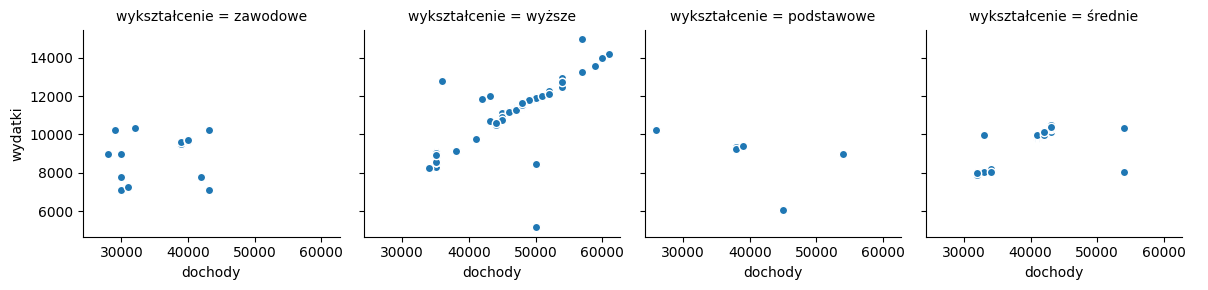

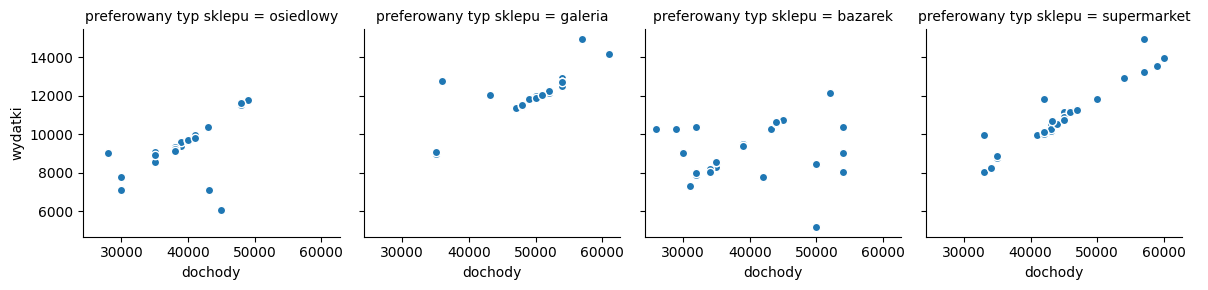

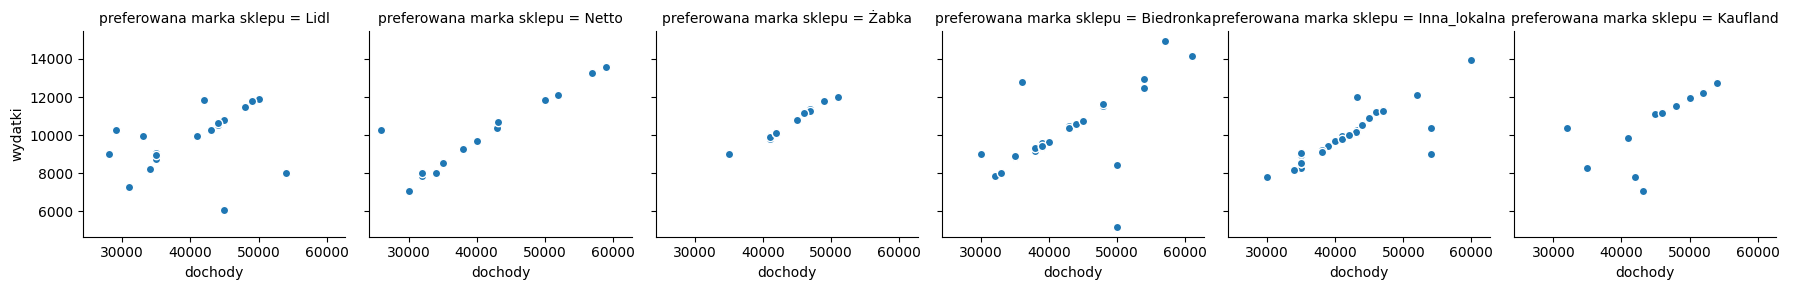

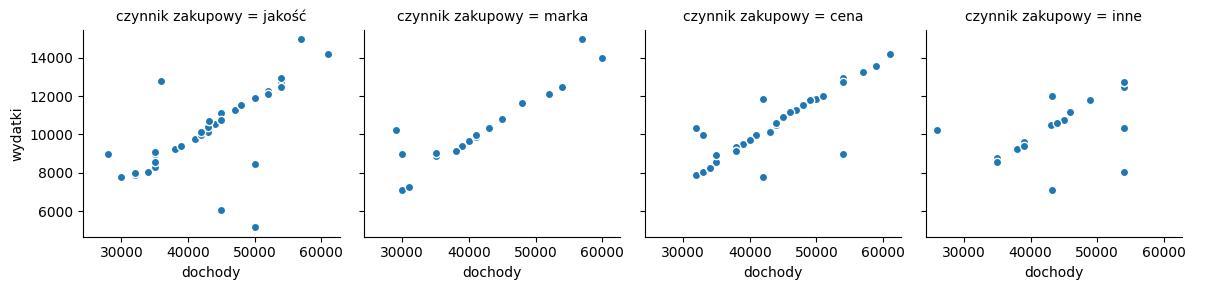

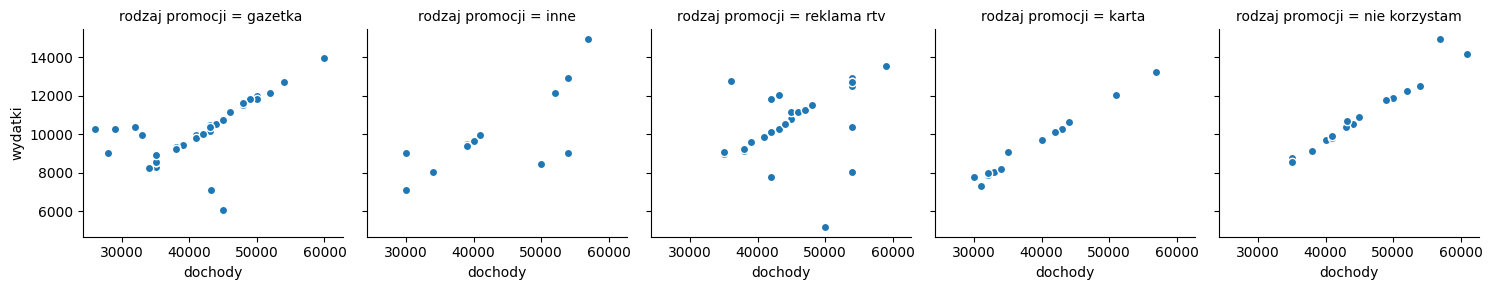

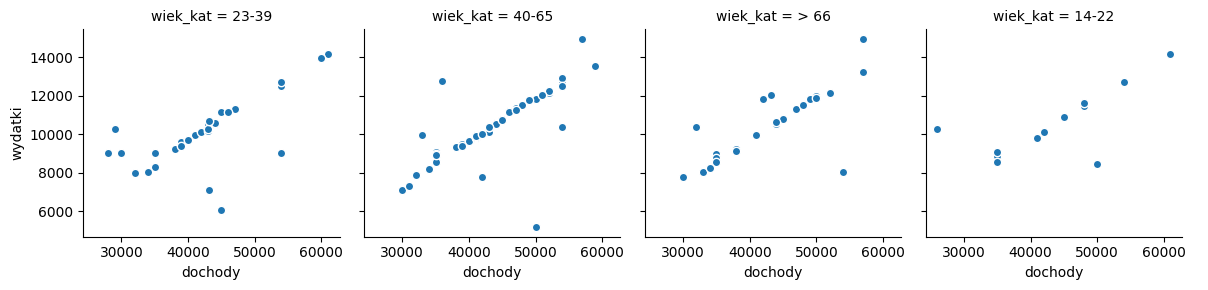

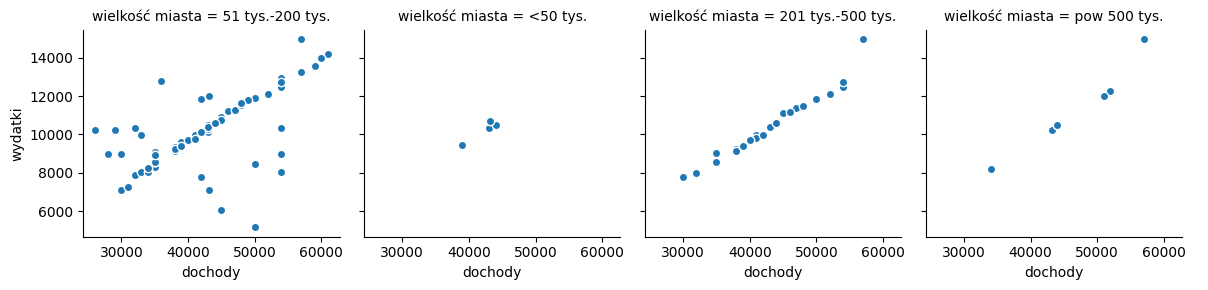

In [138]:
lista_1 = ['dochody', 'wydatki']

lista_2 = ['płeć', 'wykształcenie', 'preferowany typ sklepu', 'preferowana marka sklepu', 'czynnik zakupowy',
          'rodzaj promocji', 'wiek_kat', 'wielkość miasta']

for element1 in lista_1:
    for element2 in lista_2:
        title = f"Statystyki: [{element1} - {element2}]"
        #display(title)
        g = sns.FacetGrid(data=dane, col=element2)
        g = g.map(plt.scatter, "dochody", 'wydatki', edgecolor="w")
        g.add_legend()

        # g = sns.FacetGrid(data=dane, col=element2, hue='płeć')
        # g = g.map(plt.scatter, "dochody", 'wydatki', edgecolor="w")
        # g.add_legend() 


